# Perform Clustering(Hierarchical, Kmeans & DBSCAN) on World development mesurement data, identify the number of clusters formed based on their socio economic develpoment and draw inferences. 

In [1]:
#importing necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler 
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering , KMeans , DBSCAN
from sklearn.metrics import silhouette_score as sil 

import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_excel('World_development_mesurement.xlsx')
df.head() 

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


## Descriptive Analysis

In [3]:
df.shape

(2704, 25)

In [4]:
df.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [6]:
df.duplicated().sum()

0

In [7]:
len(df['Country'].value_counts()) 
# Here, we have data for 208 unique terretories

208

In [8]:
df['Country'].value_counts() 
#and each country is having 13 entries

Algeria                  13
Angola                   13
Turkey                   13
Ukraine                  13
United Kingdom           13
                         ..
Malaysia                 13
Maldives                 13
Mongolia                 13
Myanmar                  13
Virgin Islands (U.S.)    13
Name: Country, Length: 208, dtype: int64

In [9]:
df[df['Country'] == 'Algeria'] 

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
208,0.019,NaN,84293.0,Algeria,NaN,NaN,27072.0,"$54,744,716,706",0.038,$65,...,68.0,0.0,1,0.330,0.630,0.040,32150198,0.607,"$100,000,000","$194,000,000"
416,0.019,NaN,90854.0,Algeria,NaN,NaN,28773.0,"$56,760,288,962",0.037,$65,...,68.0,0.0,1,0.318,0.641,0.041,32572977,0.615,"$111,000,000","$248,000,000"
624,0.020,NaN,92533.0,Algeria,25.0,NaN,30698.0,"$67,863,832,648",0.036,$74,...,68.0,0.0,1,0.307,0.651,0.042,33003442,0.623,"$112,000,000","$255,000,000"
832,0.020,NaN,89493.0,Algeria,25.0,NaN,30974.0,"$85,324,997,370",0.035,$90,...,68.0,0.1,1,0.297,0.660,0.043,33461345,0.631,"$178,000,000","$341,000,000"
1040,0.021,76.9%,107128.0,Algeria,25.0,NaN,32335.0,"$103,198,650,298",0.031,$95,...,68.0,0.4,1,0.289,0.667,0.044,33960903,0.638,"$477,000,000","$660,000,000"
1248,0.022,76.9%,103963.0,Algeria,25.0,NaN,34658.0,"$117,026,655,314",0.031,$106,...,68.0,0.6,1,0.282,0.673,0.045,34507214,0.646,"$393,000,000","$414,000,000"
1456,0.023,74.2%,112339.0,Algeria,25.0,NaN,36793.0,"$134,977,867,932",0.035,$135,...,69.0,0.8,1,0.277,0.677,0.046,35097043,0.653,"$332,000,000","$504,000,000"
1664,0.024,73.8%,114619.0,Algeria,25.0,NaN,37425.0,"$171,000,162,581",0.038,$183,...,69.0,0.8,1,0.274,0.680,0.047,35725377,0.661,"$474,000,000","$617,000,000"
1872,0.024,72.0%,124586.0,Algeria,25.0,NaN,40823.0,"$137,211,795,394",0.046,$174,...,69.0,0.9,1,0.272,0.681,0.047,36383302,0.668,"$381,000,000","$574,000,000"


In [10]:
df.isna().sum().sum() # dealing with them in next section

11740

### Dealing with null values 

### When we have such a large number of missing values present in our data, we have 2 options. 

1) Deletion : Deletion of rows (if you have large volume of data)
              
              Deletion of columns (if > 50% of data is null)
              
2) Imputation: for numeric column-- use mean/median/mode
               
              for categorical columns-- use mode or ration
                

### 1) Deletion: 

### Deleting columns having high % of null values: 

In [11]:
# Column wise null values
total_null = df.isnull().sum().sort_values(ascending=False)  
percent_null = ((df.isnull().sum() / df.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
Ease of Business,2519,93.158284
Hours to do Tax,1288,47.633136
Business Tax Rate,1281,47.374260
Days to Start Business,986,36.464497
Energy Usage,919,33.986686
Lending Interest,824,30.473373
CO2 Emissions,579,21.412722
Tourism Outbound,471,17.418639
Tourism Inbound,368,13.609467
Health Exp % GDP,309,11.427515


In [12]:
# we will delete columns having more than 45% entries as null
list = []
for col in df.columns:
    if df[col].isna().sum() > df.shape[0] * 0.45 :
        list.append(col)
list 

['Business Tax Rate', 'Ease of Business', 'Hours to do Tax']

In [13]:
df1 = df.drop(columns=list) # dropping columns riddled with missing values
df1 = df1.drop(columns=['Number of Records' ]) # dropping columns not having any contribution towards clustering

df1.shape 

(2704, 21)

In [14]:
df2 = df1 

In [15]:
df2.head() 

,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,Algeria,NaN,26998.0,"$54,790,058,957",0.035,$60,0.034,0.0,...,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,9542.0,Angola,NaN,7499.0,"$9,129,594,819",0.034,$22,0.128,0.0,...,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,1617.0,Benin,NaN,1983.0,"$2,359,122,303",0.043,$15,0.090,0.0,...,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,4276.0,Botswana,NaN,1836.0,"$5,788,311,645",0.047,$152,0.054,0.0,...,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,1041.0,Burkina Faso,NaN,NaN,"$2,610,959,139",0.051,$12,0.096,0.0,...,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [16]:
#Types of variables

numeric_features = [feature for feature in df2.columns if df2[feature].dtypes != 'O']
print('numeric features:', numeric_features, '\n') 

numeric features: ['Birth Rate', 'CO2 Emissions', 'Days to Start Business', 'Energy Usage', 'Health Exp % GDP', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban'] 



In [17]:
#under numeric features there are 2 types of features ie. discrete and categorical

discrete_features = [feature for feature in numeric_features if len(df2[feature].unique())<25]
print('discrete features:', discrete_features, '\n')

continuous_features = [feature for feature in numeric_features if feature not in discrete_features]
print('continuous features:', continuous_features, '\n') 

discrete features: ['Internet Usage'] 

continuous features: ['Birth Rate', 'CO2 Emissions', 'Days to Start Business', 'Energy Usage', 'Health Exp % GDP', 'Infant Mortality Rate', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban'] 



In [18]:
#categorical_features

categorical_features = [feature for feature in df2.columns if df2[feature].dtypes == 'O']
print('categorical_features:', categorical_features) 

categorical_features: ['Country', 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']


In [19]:
df2[categorical_features].head()
# As we can see, features mentioned above as 'categorical_features' are numerical features by nature.
#so lets convert them to numeric form by doing some string operation. 

,Country,GDP,Health Exp/Capita,Tourism Inbound,Tourism Outbound
0,Algeria,"$54,790,058,957",$60,"$102,000,000","$193,000,000"
1,Angola,"$9,129,594,819",$22,"$34,000,000","$146,000,000"
2,Benin,"$2,359,122,303",$15,"$77,000,000","$50,000,000"
3,Botswana,"$5,788,311,645",$152,"$227,000,000","$209,000,000"
4,Burkina Faso,"$2,610,959,139",$12,"$23,000,000","$30,000,000"


In [20]:
df2.rename(columns={'GDP': 'GDP_$', 'Health Exp/Capita': 'Health Exp/Capita_$' , 'Tourism Inbound':'Tourism Inbound_$', 
                    'Tourism Outbound': 'Tourism Outbound_$' }, inplace=True)


In [21]:
 # removing $ sign which gives these columns non numeric appearance
df2['GDP_$'] = df2['GDP_$'].str.replace('$', '')
df2['Health Exp/Capita_$'] = df2['Health Exp/Capita_$'].str.replace('$', '')
df2['Tourism Inbound_$'] = df2['Tourism Inbound_$'].str.replace('$', '') 
df2['Tourism Outbound_$'] = df2['Tourism Outbound_$'].str.replace('$', '')  

# removing , sign which gives these columns non numeric appearance & type casting
df2['GDP_$'] = df2['GDP_$'].str.replace(',', '').astype('Int64') 
df2['Health Exp/Capita_$'] = df2['Health Exp/Capita_$'].str.replace(',', '').astype('Int64')
df2['Tourism Inbound_$'] = df2['Tourism Inbound_$'].str.replace(',', '').astype('Int64')
df2['Tourism Outbound_$'] = df2['Tourism Outbound_$'].str.replace(',', '').astype('Int64')

In [22]:
categorical_features = [feature for feature in df2.columns if df2[feature].dtypes == 'O']
print('categorical_features:', categorical_features)  

# 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound' converted into int

categorical_features: ['Country']


In [23]:
df2.info() # all variables are numeric (int or float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   CO2 Emissions           2125 non-null   float64
 2   Country                 2704 non-null   object 
 3   Days to Start Business  1718 non-null   float64
 4   Energy Usage            1785 non-null   float64
 5   GDP_$                   2494 non-null   Int64  
 6   Health Exp % GDP        2395 non-null   float64
 7   Health Exp/Capita_$     2395 non-null   Int64  
 8   Infant Mortality Rate   2444 non-null   float64
 9   Internet Usage          2531 non-null   float64
 10  Lending Interest        1880 non-null   float64
 11  Life Expectancy Female  2568 non-null   float64
 12  Life Expectancy Male    2568 non-null   float64
 13  Mobile Phone Usage      2537 non-null   float64
 14  Population 0-14         2484 non-null   

### Deleting 'Countries' having high numbers of totally null columns 

In [24]:
df2.shape 

(2704, 21)

In [25]:
for country in df2.Country.unique():
    df_country_name = df2[df2['Country'] ==country]

    for i in range(0,21):
        if df_country_name.isna().sum()[i] == df_country_name.shape[0]  :
            print(country, '----{column no:}', i+1) 
            
# Burkina Faso has column no 5 as totally null

Benin ----{column no:} 11
Burkina Faso ----{column no:} 5
Burkina Faso ----{column no:} 11
Burundi ----{column no:} 5
Central African Republic ----{column no:} 5
Chad ----{column no:} 5
Cote d'Ivoire ----{column no:} 11
Eritrea ----{column no:} 11
Eritrea ----{column no:} 21
Ghana ----{column no:} 11
Guinea ----{column no:} 5
Guinea-Bissau ----{column no:} 11
Liberia ----{column no:} 5
Madagascar ----{column no:} 5
Malawi ----{column no:} 5
Mali ----{column no:} 5
Mali ----{column no:} 11
Mauritania ----{column no:} 5
Mauritania ----{column no:} 20
Mauritania ----{column no:} 21
Niger ----{column no:} 5
Niger ----{column no:} 11
Rwanda ----{column no:} 5
Senegal ----{column no:} 11
Sierra Leone ----{column no:} 5
Somalia ----{column no:} 4
Somalia ----{column no:} 5
Somalia ----{column no:} 6
Somalia ----{column no:} 7
Somalia ----{column no:} 8
Somalia ----{column no:} 11
Somalia ----{column no:} 20
Somalia ----{column no:} 21
South Sudan ----{column no:} 2
South Sudan ----{column no:

In [26]:
list = []
for country in df2.Country.unique():
    df_country_name = df2[df2['Country'] ==country]

    for i in range(0,21):
        if df_country_name.isna().sum()[i] == df_country_name.shape[0]  :
            list.append(country)
 

In [27]:
null_col_country = pd.DataFrame() 
null_col_country['Country'] = list 

null_col_country['Country'].value_counts()  

#Turks and Caicos Islands  has 16 out of 21 columns totally null

American Samoa               16
Turks and Caicos Islands     16
St. Martin (French part)     16
Isle of Man                  14
Sint Maarten (Dutch part)    13
                             ..
Luxembourg                    1
Senegal                       1
Portugal                      1
Rwanda                        1
Benin                         1
Name: Country, Length: 69, dtype: int64

In [28]:
#deleting countries having more than 1/4th columns totally blank
list = []
for i in range (0,len(null_col_country['Country'].value_counts())):
    if null_col_country['Country'].value_counts()[i] >= 6:
        list.append(null_col_country['Country'].value_counts().index[i])
        
list 
#these are countries having more than 6 columns as totally blank
#also St. Kitts and Nevis, Dominica, Marshall Islands have 6 columns as almost totally blank
#deleting all these contries

['American Samoa',
 'Turks and Caicos Islands',
 'St. Martin (French part)',
 'Isle of Man',
 'Sint Maarten (Dutch part)',
 'Cayman Islands',
 'Liechtenstein',
 'Monaco',
 'Greenland',
 'Faeroe Islands',
 'Guam',
 'Andorra',
 'Kosovo',
 'Virgin Islands (U.S.)',
 'Bermuda',
 'Curacao',
 'Korea, Dem. Rep.',
 'Somalia',
 'San Marino',
 'French Polynesia',
 'New Caledonia',
 'South Sudan',
 'Puerto Rico']

In [29]:
list.extend(['St. Kitts and Nevis', 'Dominica', 'Marshall Islands']) 

In [30]:
df2.shape 

(2704, 21)

In [31]:
list1 = []

for i in range(0, len(df2)):
    for j in range (0,len(list)):
        if df2['Country'][i] == list[j]:
            list1.append(i)            

In [32]:
list1[0:5]
#these are index numbers where lies records of those countries which have more than 6 columns are totally null
# we will remove these indexes. 

[42, 44, 67, 88, 99]

In [33]:
df2.drop(list1, inplace=True)
df2.shape 

(2366, 21)

In [34]:
df2 = df2.reset_index()

In [35]:
df2.drop(columns=['index'], inplace=True) 

## Inserting Lending Rates from Online sources

### Benin 

In [36]:
list = [np.nan,np.nan,np.nan,np.nan,np.nan,0.08,0.047,0.048,0.05,0.050, 
        0.051,0.053,0.05] 
# from world bank site

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Benin':
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
    
        

### Burkina Faso

In [37]:
list = [np.nan,np.nan,np.nan,np.nan,np.nan,0.089,0.047,0.048,0.05,0.05,0.051,0.053,0.05] # from world bank site

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Burkina Faso':
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

### Eritrea 

In [38]:
# from bank of eritrea website: The interest rate varies from 9-12% per annum
list = np.random.uniform(0.09,0.12, 13) 

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] == "Eritrea" :
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

###  Ghana

In [39]:
#https://www.bog.gov.gh/economic-data/interest-rates/
list = [0.27,0.27,0.245,0.215,0.185,0.155,0.125,0.135,0.17,0.18,0.135,0.125,0.15]

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] == "Ghana" :
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        

### Guinea Bissau


In [40]:
list = [np.nan,np.nan,np.nan,np.nan,np.nan,0.104,0.047,0.048,0.05,0.05,0.051,0.053,0.05] # from world bank site

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Guinea-Bissau':
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

### Mali

In [41]:
list = [np.nan,np.nan,np.nan,np.nan,np.nan,0.087,0.047,0.048,0.05,0.05,0.051,0.053,0.05] # from world bank site

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Mali':
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

###  Niger

In [42]:
list = [np.nan,np.nan,np.nan,np.nan,np.nan,0.108,0.047,0.048,0.05,0.05,0.051,0.053,0.05] # from world bank site

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Niger':
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

### Senegal

In [43]:
list = [np.nan,np.nan,np.nan,np.nan,np.nan,0.07,0.047,0.048,0.05,0.05,0.051,0.053,0.05] # from world bank site

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Senegal':
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

### Togo

In [44]:
list = [np.nan,np.nan,np.nan,np.nan,np.nan,0.088,0.047,0.048,0.05,0.05,0.051,0.053,0.05] # from world bank site

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Togo':
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

### Uganda 

In [45]:
list = [0.229,0.227,0.191,0.189,0.206,0.196,0.187,0.191,0.205,0.21,0.202,0.218,0.262] # from world bank site

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Uganda':
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

### Zimbabwe 

In [46]:
list = [0.682, 0.38 , 0.365, 0.973, 2.789, 2.357, 4.965,  np.nan,np.nan,
        np.nan, np.nan, np.nan,0.116] # from world bank site

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Zimbabwe':
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

###  Afghanistan 

In [47]:
list = [0.682, 0.38 , 0.365, 0.973, 2.789, 2.357, 4.965,  np.nan,np.nan,
        np.nan, np.nan, np.nan,0.116] # from world bank site

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Afghanistan':
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

### Kazakhstan  

In [48]:
list = [0.24,0.24,0.24,0.08,0.085,0.09,0.10,0.12,0.115,0.08,0.08,0.825,0.07] 
#https://www.focus-economics.com/country-indicator/kazakhstan/interest-rate

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Kazakhstan':
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

###  Tunisia 

In [49]:
list = [0.0575,0.0575,0.0575,0.05,0.05,0.05,0.0525,0.0525,0.0525,0.045,0.045,0.035,0.040] 
#https://www.focus-economics.com/country-indicator/tunisia/interest-rate

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Tunisia':
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

### Asutria

In [50]:
list = [np.nan, np.nan, 0.03,0.02,0.02,0.0225,0.035,0.04,0.025,0.01,0.01,0.01,0.0075] 
#https://www.focus-economics.com/country-indicator/austria/interest-rate

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Austria':
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

###  Luxmebourg  

In [51]:
list = [np.nan, np.nan, 0.03,0.02,0.02,0.0225,0.035,0.04,0.025,0.01,0.01,0.01,0.0075] 
#https://www.focus-economics.com/country-indicator/luxembourg/interest-rate

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Luxembourg':
      
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

### portugal

In [52]:
list = [np.nan, np.nan, 0.03,0.02,0.02,0.0225,0.035,0.04,0.025,0.01,0.01,0.01,0.0075] 
#https://www.focus-economics.com/country-indicator/portugal/interest-rate

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Portugal':
       
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

###  Turkey

In [53]:
list = [0.80,0.55,0.45,0.25,0.15,0.10,0.15,0.15,0.15,0.05,0.05,0.05,0.05] 
#https://www.focus-economics.com/country-indicator/turkey/interest-rate

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Turkey':
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

###  Saudi arabia

In [54]:
list = [0.07,0.03,0.02,0.015,0.025,0.045,0.05,0.055,0.025,0.02,0.02,0.02,0.02] 
#https://www.focus-economics.com/country-indicator/saudi-arabia/interest-rate

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Saudi Arabia':
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

###  Cuba

In [55]:
list = [0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225] 

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =='Cuba':
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

### Cote d'Ivoire 

In [56]:
list = [np.nan,np.nan,np.nan,np.nan,np.nan,0.07,0.047,0.048,0.05,0.05,0.051,0.053,0.05] # from world bank site

j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =="Cote d'Ivoire":
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

### Sudan

In [57]:
list = [np.nan,np.nan,np.nan, 0.17,0.18,0.11,0.11,0.12,0.12,0.12,0.12,0.10, 0.11]
#https://take-profit.org/en/statistics/interest-rate/sudan
j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =="Sudan":
       
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
        

### Uzbekistan

In [58]:
list = [0.28, 0.24,0.30,0.24,0.20,0.16,0.16,0.14,0.14,0.14,0.14,0.12,0.12]
#Central bank of Uzbekistan  -- https://cbu.uz/en/monetary-policy/refinancing-rate/levels/
j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =="Uzbekistan":
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        

### Turkmenistan

In [59]:
list = [np.nan,np.nan,np.nan,np.nan, np.nan,np.nan,np.nan, 0.019, 0.019, 0.020, 0.0125, 0.0125, 0.125]
# Asian development bank -- adb.org/statistics
j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =="Turkmenistan":
        
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        


### Cambodia

In [60]:
list = [0.279,0.267,0.219,0.204,0.173, np.nan,np.nan,np.nan,np.nan, np.nan,np.nan,np.nan,np.nan]
# https://tradingeconomics.com/cambodia/interest-rate
j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =="Cambodia":
       
        df2['Lending Interest'][i] = list[j]
        j = j + 1
        
#Kiribati, Marshall Islands 

## Inserting GDP from Online sources

### Myanmar

In [61]:
list = [6850000000, 6220000000, 6110000000, 7750000000, 9390000000, 6220000000,10590000000, 
       11860000000, 15590000000, 23010000000, 29460000000, 37800000000, 54120000000, 58320000000]

# https://data.worldbank.org/indicator/
j = 0 
for i in range(0, len(df2)):
    if df2['Country'][i] =="Myanmar":
       
        df2['GDP_$'][i] = list[j]
        j = j + 1

## Imputing Energy Usage with Simple Linear Regression

We lack online resources to insert accurate data of energy usage wrt countries, hence we have to use linear regression 

In [62]:
df2.corr()['Energy Usage'].sort_values(ascending=False)[0:3]
#we take predictor CO2 emission to predict missing values of Energy usage

Energy Usage     1.000000
CO2 Emissions    0.988721
GDP_$            0.860952
Name: Energy Usage, dtype: float64

<AxesSubplot: xlabel='CO2 Emissions', ylabel='Energy Usage'>

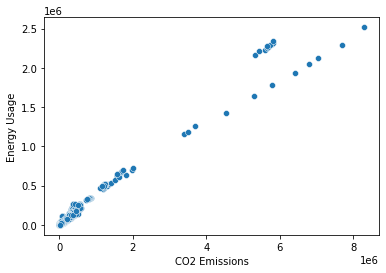

In [63]:
sns.scatterplot(df2['CO2 Emissions'] , df2['Energy Usage'])
#almost perfectly linear relation

Our approch: in train dataset, value of CO2 are huge, whereas in test data co2 values are very small.. this leads to discrepency in prediction coz model is trained on big numbers and tested on small numbers.. so what we do is, we slice train data set in such a way that it train and test dataset contains CO2 values of same range. 

Meaning: if test data has co2 values in hundreds, then we will trim our train dataset to have only co2 values which are in hundreds and delete values of magnitude thounsand and lakhs. 

In [64]:
# we need only 2 columns -- CO2 Emissions, energy usage
# training data = All non null values for y (energy usage) and xCO2 Emissions) (from which our model will learn)
#test data = all non null values for x(CO2 Emissions) and null values for y(energy usage) (which our model will predict)

df_eu = df2[[ 'CO2 Emissions', 'Energy Usage']]   
df_eu.head() # only 2 columns 

,CO2 Emissions,Energy Usage
0,87931.0,26998.0
1,9542.0,7499.0
2,1617.0,1983.0
3,4276.0,1836.0
4,1041.0,NaN


In [65]:
df_eu_train = df_eu[np.isfinite(df_eu['Energy Usage'])] # All non null values for y (energy usage) 
print('Shape after removing null values for energy usage:', df_eu_train.shape)

df_eu_train.dropna(axis=0, inplace=True) #All non null values for x(CO2 Emissions)
print('Shape after removing null values for CO2 Emissions:', df_eu_train.shape)  

Shape after removing null values for energy usage: (1749, 2)
Shape after removing null values for CO2 Emissions: (1572, 2)


In [66]:
df_eu_train.head()

,CO2 Emissions,Energy Usage
0,87931.0,26998.0
1,9542.0,7499.0
2,1617.0,1983.0
3,4276.0,1836.0
6,3432.0,6310.0


In [67]:
df_eu_test = df_eu[df_eu['Energy Usage'].isna()] #null values of y(Energy Usage) 
print('Shape after keeping only null values of Energy Usage', df_eu_test.shape)

df_eu_test.dropna(subset=['CO2 Emissions'], inplace=True) 
print('Shape after removing null values of CO2 Emissions', df_eu_test.shape)  

Shape after keeping only null values of Energy Usage (617, 2)
Shape after removing null values of CO2 Emissions (410, 2)


In [68]:
df_eu_test.head()

,CO2 Emissions,Energy Usage
4,1041.0,NaN
5,301.0,NaN
7,268.0,NaN
8,176.0,NaN
9,84.0,NaN


In [69]:
df_eu_test['CO2 Emissions'].min() ,df_eu_test['CO2 Emissions'].max()

(18.0, 8236.0)

<AxesSubplot: xlabel='CO2 Emissions'>

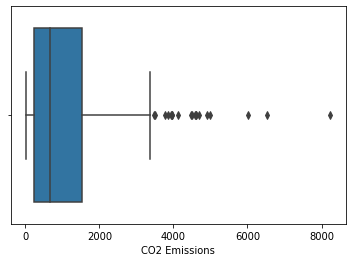

In [70]:
sns.boxplot(df_eu_test['CO2 Emissions'])

In [71]:
#lets remove last 3 outliers 
df_eu_test[df_eu_test['CO2 Emissions']> 5000 ] 

,CO2 Emissions,Energy Usage
561,6018.0,NaN
1689,6524.0,NaN
1871,8236.0,NaN


In [72]:
df_eu_test.drop(df_eu_test[df_eu_test['CO2 Emissions']> 5000 ].index, inplace=True)

In [73]:
# now test data has range of
df_eu_test['CO2 Emissions'].min() ,df_eu_test['CO2 Emissions'].max()

(18.0, 4980.0)

In [74]:
#so we will trim our train data such that CO2 values are not beyond 5000
df_eu_train = df_eu_train[df_eu_train['CO2 Emissions'] < 5000] 

In [75]:
df_eu_train_x = df_eu_train[['CO2 Emissions']] 
df_eu_train_y = pd.DataFrame(df_eu_train['Energy Usage'] , columns=['Energy Usage'])  

In [76]:
df_eu_test_x = pd.DataFrame(df_eu_test['CO2 Emissions'], columns=['CO2 Emissions']) 
# no column such as df_eu_test_y because that we are going to predict

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() 

In [78]:
scaler_x.fit(df_eu_train_x)

df_eu_train_x = scaler_x.transform(df_eu_train_x)
df_eu_test_x = scaler_x.transform(df_eu_test_x) 

In [79]:
scaler_y = MinMaxScaler() 

scaler_y.fit(df_eu_train_y) 
df_eu_train_y = scaler_y.transform((df_eu_train_y)) 

In [80]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df_eu_train_x, df_eu_train_y) 

y_pred = lr.predict(df_eu_test_x)  

eu_impute = pd.DataFrame(y_pred, columns=['eu'])

eu_impute = eu_impute.set_index(df_eu_test.index)  

eu_impute.head() 

,eu
4,0.072017
5,0.044719
7,0.043502
8,0.040108
9,0.036714


In [81]:
energy_pred = pd.DataFrame(scaler_y.inverse_transform(eu_impute), columns=['eu'])
energy_pred = energy_pred.set_index(df_eu_test.index)   
energy_pred  

,eu
4,1998.552831
5,1244.040283
7,1210.393102
8,1116.588839
9,1022.784577
...,...
1984,1202.236210
1986,2671.496454
1995,1348.040661
1996,1150.236020


In [82]:
energy_pred['eu'].min()   , energy_pred['eu'].max()  

(955.490214234176, 6014.802729743029)

In [83]:
print('Null count before imputation:', df2['Energy Usage'].isna().sum() )

df2['Energy Usage'].fillna(energy_pred['eu'], inplace=True)

print('Null count after imputation:', df2['Energy Usage'].isna().sum() ) 

Null count before imputation: 617
Null count after imputation: 210


## ------

In [84]:
for country in df2.Country.unique():
    df_country_name = df2[df2['Country'] ==country]

    for i in range(0,21):
        if df_country_name.isna().sum()[i] == df_country_name.shape[0]  :
            print(country, '----{column no:}', i+1) 
#still there are few countries having some totally blank columns, 
#we will remove these countries from df2 and store them in separate dataset          

Eritrea ----{column no:} 21
Mauritania ----{column no:} 20
Mauritania ----{column no:} 21
Zimbabwe ----{column no:} 7
Zimbabwe ----{column no:} 8
Zimbabwe ----{column no:} 21
Hong Kong SAR, China ----{column no:} 7
Hong Kong SAR, China ----{column no:} 8
Hong Kong SAR, China ----{column no:} 9
Macao SAR, China ----{column no:} 4
Macao SAR, China ----{column no:} 7
Macao SAR, China ----{column no:} 8
Macao SAR, China ----{column no:} 9
Turkmenistan ----{column no:} 4
Turkmenistan ----{column no:} 20
Turkmenistan ----{column no:} 21
Uzbekistan ----{column no:} 21
Kiribati ----{column no:} 11
Aruba ----{column no:} 4
Aruba ----{column no:} 7
Aruba ----{column no:} 8
Aruba ----{column no:} 9
Cuba ----{column no:} 4
Cuba ----{column no:} 21


In [85]:
list = ['Eritrea', 'Mauritania', 'Zimbabwe', 'Hong Kong SAR, China', 'Macao SAR, China',
        'Turkmenistan','Uzbekistan', 'Kiribati', 'Aruba', 'Cuba' ]

In [86]:
list1 = []

for i in range(0, len(df2)):
    for j in range (0,len(list)):
        if df2['Country'][i] == list[j]:
            list1.append(i)            

In [87]:
df3 = pd.DataFrame()
df4 = pd.DataFrame()

In [88]:
df3 = df2.drop(list1) #df3 has countries having no column as totally null
df3.shape

(2236, 21)

In [89]:
df3.isna().sum().sum() 

1844

In [90]:
#df4 has countries having some columns totally blank
df4 = df2.iloc[[16, 30, 50, 60, 68, 81, 82, 140, 150, 160, 198, 212, 232, 242, 250, 263,
                264, 322, 332, 342, 380, 394, 414, 424, 432, 445, 446, 504, 514, 524, 562, 576,
                596, 606, 614, 627, 628, 686, 696, 706, 744, 758, 778, 788, 796, 809, 810, 868, 878,
                888, 926, 940, 960, 970, 978, 991, 992, 1050, 1060, 1070, 1108, 1122, 1142, 1152, 1160,
                1173, 1174, 1232, 1242, 1252, 1290, 1304, 1324, 1334, 1342, 1355, 1356, 1414, 1424, 1434, 
                1472, 1486, 1506, 1516, 1524, 1537, 1538, 1596, 1606, 1616, 1654, 1668, 1688, 1698, 1706, 1719,
                1720, 1778, 1788, 1798, 1836, 1850, 1870, 1880, 1888, 1901, 1902, 1960, 1970, 1980, 2018, 2032, 2052,
                2062, 2070, 2083, 2084, 2142, 2152, 2162, 2200, 2214, 2234, 2244, 2252, 2265, 2266, 2324, 2334, 2344] , : ] 

df4.shape 

(130, 21)

In [91]:
df4.isna().sum().sum()  

409

## KNN Imputer on df3

In [92]:
# Building function for imputing missing values 'country wise'
df_final = pd.DataFrame()

for country in df3.Country.unique():

    df_country_name = df3[df3['Country'] ==country] 
    df_country= df_country_name.drop(columns=['Country']) 

    from sklearn.impute import KNNImputer
    imputer = KNNImputer(n_neighbors=2, metric= 'nan_euclidean', weights='distance')

    imputer.fit(df_country)

    Xtrans = imputer.transform(df_country)

    df_country_imp = pd.DataFrame(Xtrans, columns=df_country.columns )
    df_country_imp['Country'] =  df_country_name['Country'].values
    df_country_imp 
    
    df_final = df_final.append(df_country_imp, ignore_index=True) 

In [93]:
df_final.head() #dataframe with imputed missing values 

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP_$,Health Exp % GDP,Health Exp/Capita_$,Infant Mortality Rate,Internet Usage,Lending Interest,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound_$,Tourism Outbound_$,Country
0,0.020,87931.0,25.0,26998.0,5.479006e+10,0.035,60.0,0.034,0.0,0.100,...,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,Algeria
1,0.019,84293.0,25.0,27072.0,5.474472e+10,0.038,65.0,0.033,0.0,0.095,...,68.0,0.0,0.330,0.630,0.040,32150198.0,0.607,100000000.0,194000000.0,Algeria
2,0.019,90854.0,25.0,28773.0,5.676029e+10,0.037,65.0,0.032,0.0,0.086,...,68.0,0.0,0.318,0.641,0.041,32572977.0,0.615,111000000.0,248000000.0,Algeria
3,0.020,92533.0,25.0,30698.0,6.786383e+10,0.036,74.0,0.031,0.0,0.081,...,68.0,0.0,0.307,0.651,0.042,33003442.0,0.623,112000000.0,255000000.0,Algeria
4,0.020,89493.0,25.0,30974.0,8.532500e+10,0.035,90.0,0.030,0.0,0.080,...,68.0,0.1,0.297,0.660,0.043,33461345.0,0.631,178000000.0,341000000.0,Algeria


In [94]:
#df_ex is used to show what values are imputed by knn imputer for India's missing values for CO2 emission
df_ex = pd.DataFrame()
df_ex['Given'] = df2[df2['Country'] == 'India']['CO2 Emissions']  
df_ex['Imputed'] = df_final[df_final['Country'] == 'India']['CO2 Emissions'].values 

In [95]:
df_ex.tail(4) 

,Given,Imputed
1699,1982263.0,1.982263e+06
1881,2008823.0,2.008823e+06
2063,NaN,2.002180e+06
2245,NaN,2.002619e+06


In [96]:
# df4 countries have few columns entirely blank, so we cant use knn imputer on these contries individually.. 
# so we will now append df4 to df_final so that while imputing null values knn imputer can take reference from larger dataset. 

In [97]:
df_final.shape 

(2236, 21)

In [98]:
df4.shape 

(130, 21)

In [99]:
df_final = df_final.append(df4, ignore_index = True) 

In [100]:
df_final.shape 

(2366, 21)

In [101]:
df_final 

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP_$,Health Exp % GDP,Health Exp/Capita_$,Infant Mortality Rate,Internet Usage,Lending Interest,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound_$,Tourism Outbound_$,Country
0,0.020,87931.0,25.0,26998.0,54790058957.0,0.035,60.0,0.034,0.0,0.1000,...,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,Algeria
1,0.019,84293.0,25.0,27072.0,54744716706.0,0.038,65.0,0.033,0.0,0.0950,...,68.0,0.0,0.330,0.630,0.040,32150198.0,0.607,100000000.0,194000000.0,Algeria
2,0.019,90854.0,25.0,28773.0,56760288962.0,0.037,65.0,0.032,0.0,0.0860,...,68.0,0.0,0.318,0.641,0.041,32572977.0,0.615,111000000.0,248000000.0,Algeria
3,0.020,92533.0,25.0,30698.0,67863832648.0,0.036,74.0,0.031,0.0,0.0810,...,68.0,0.0,0.307,0.651,0.042,33003442.0,0.623,112000000.0,255000000.0,Algeria
4,0.020,89493.0,25.0,30974.0,85324997370.0,0.035,90.0,0.030,0.0,0.0800,...,68.0,0.1,0.297,0.660,0.043,33461345.0,0.631,178000000.0,341000000.0,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,0.022,NaN,NaN,NaN,35164210526.0,0.020,129.0,0.048,0.1,0.1250,...,61.0,1.1,0.286,0.673,0.041,5172931.0,0.490,<NA>,<NA>,Turkmenistan
2362,0.021,NaN,12.0,NaN,51183443225.0,0.059,105.0,0.038,0.4,0.1200,...,65.0,0.7,0.289,0.668,0.043,29774500.0,0.362,<NA>,<NA>,Uzbekistan
2363,0.023,NaN,31.0,NaN,174984469.0,0.107,187.0,0.046,0.1,NaN,...,66.0,0.2,0.324,0.636,0.040,100786.0,0.439,<NA>,<NA>,Kiribati
2364,0.010,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,0.7,0.0920,...,73.0,1.3,0.199,0.690,0.110,102384.0,0.424,1414000000.0,296000000.0,Aruba


In [102]:
#Using KNN imputer on whole dataset
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, metric= 'nan_euclidean', weights = 'distance') 

df_final_wo_name = df_final.drop(columns=['Country'])

imputer.fit(df_final_wo_name)
Xtrans = imputer.transform(df_final_wo_name)

df_final_imp = pd.DataFrame(Xtrans, columns=df_final_wo_name.columns )
df_final_imp['Country'] =  df_final['Country'].values
df_final_imp 

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP_$,Health Exp % GDP,Health Exp/Capita_$,Infant Mortality Rate,Internet Usage,Lending Interest,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound_$,Tourism Outbound_$,Country
0,0.020,87931.000000,25.000000,26998.000000,5.479006e+10,0.035000,60.000000,0.034000,0.0,0.100000,...,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,Algeria
1,0.019,84293.000000,25.000000,27072.000000,5.474472e+10,0.038000,65.000000,0.033000,0.0,0.095000,...,68.0,0.0,0.330,0.630,0.040,32150198.0,0.607,1.000000e+08,1.940000e+08,Algeria
2,0.019,90854.000000,25.000000,28773.000000,5.676029e+10,0.037000,65.000000,0.032000,0.0,0.086000,...,68.0,0.0,0.318,0.641,0.041,32572977.0,0.615,1.110000e+08,2.480000e+08,Algeria
3,0.020,92533.000000,25.000000,30698.000000,6.786383e+10,0.036000,74.000000,0.031000,0.0,0.081000,...,68.0,0.0,0.307,0.651,0.042,33003442.0,0.623,1.120000e+08,2.550000e+08,Algeria
4,0.020,89493.000000,25.000000,30974.000000,8.532500e+10,0.035000,90.000000,0.030000,0.0,0.080000,...,68.0,0.1,0.297,0.660,0.043,33461345.0,0.631,1.780000e+08,3.410000e+08,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,0.022,16487.369823,23.116094,11011.520245,3.516421e+10,0.020000,129.000000,0.048000,0.1,0.125000,...,61.0,1.1,0.286,0.673,0.041,5172931.0,0.490,1.994826e+09,1.194824e+09,Turkmenistan
2362,0.021,37165.403083,12.000000,15514.342652,5.118344e+10,0.059000,105.000000,0.038000,0.4,0.120000,...,65.0,0.7,0.289,0.668,0.043,29774500.0,0.362,2.186816e+09,4.117298e+08,Uzbekistan
2363,0.023,145.152328,31.000000,1085.136197,1.749845e+08,0.107000,187.000000,0.046000,0.1,0.092006,...,66.0,0.2,0.324,0.636,0.040,100786.0,0.439,1.413596e+09,2.959160e+08,Kiribati
2364,0.010,57.381816,31.000000,745.749255,1.740623e+08,0.107338,184.973752,0.046338,0.7,0.092000,...,73.0,1.3,0.199,0.690,0.110,102384.0,0.424,1.414000e+09,2.960000e+08,Aruba


In [103]:
print('Original size of data:', df.shape, '\n', 'Null count:', df.isna().sum().sum() )  

Original size of data: (2704, 25) 
 Null count: 11740


In [104]:
print('After null value handling size of data:', df_final_imp.shape, '\n', 'Null count:', df_final_imp.isna().sum().sum() )  

After null value handling size of data: (2366, 21) 
 Null count: 0


In [105]:
data = df_final_imp.copy() 

# Visualisation 

## Outlier Detection 

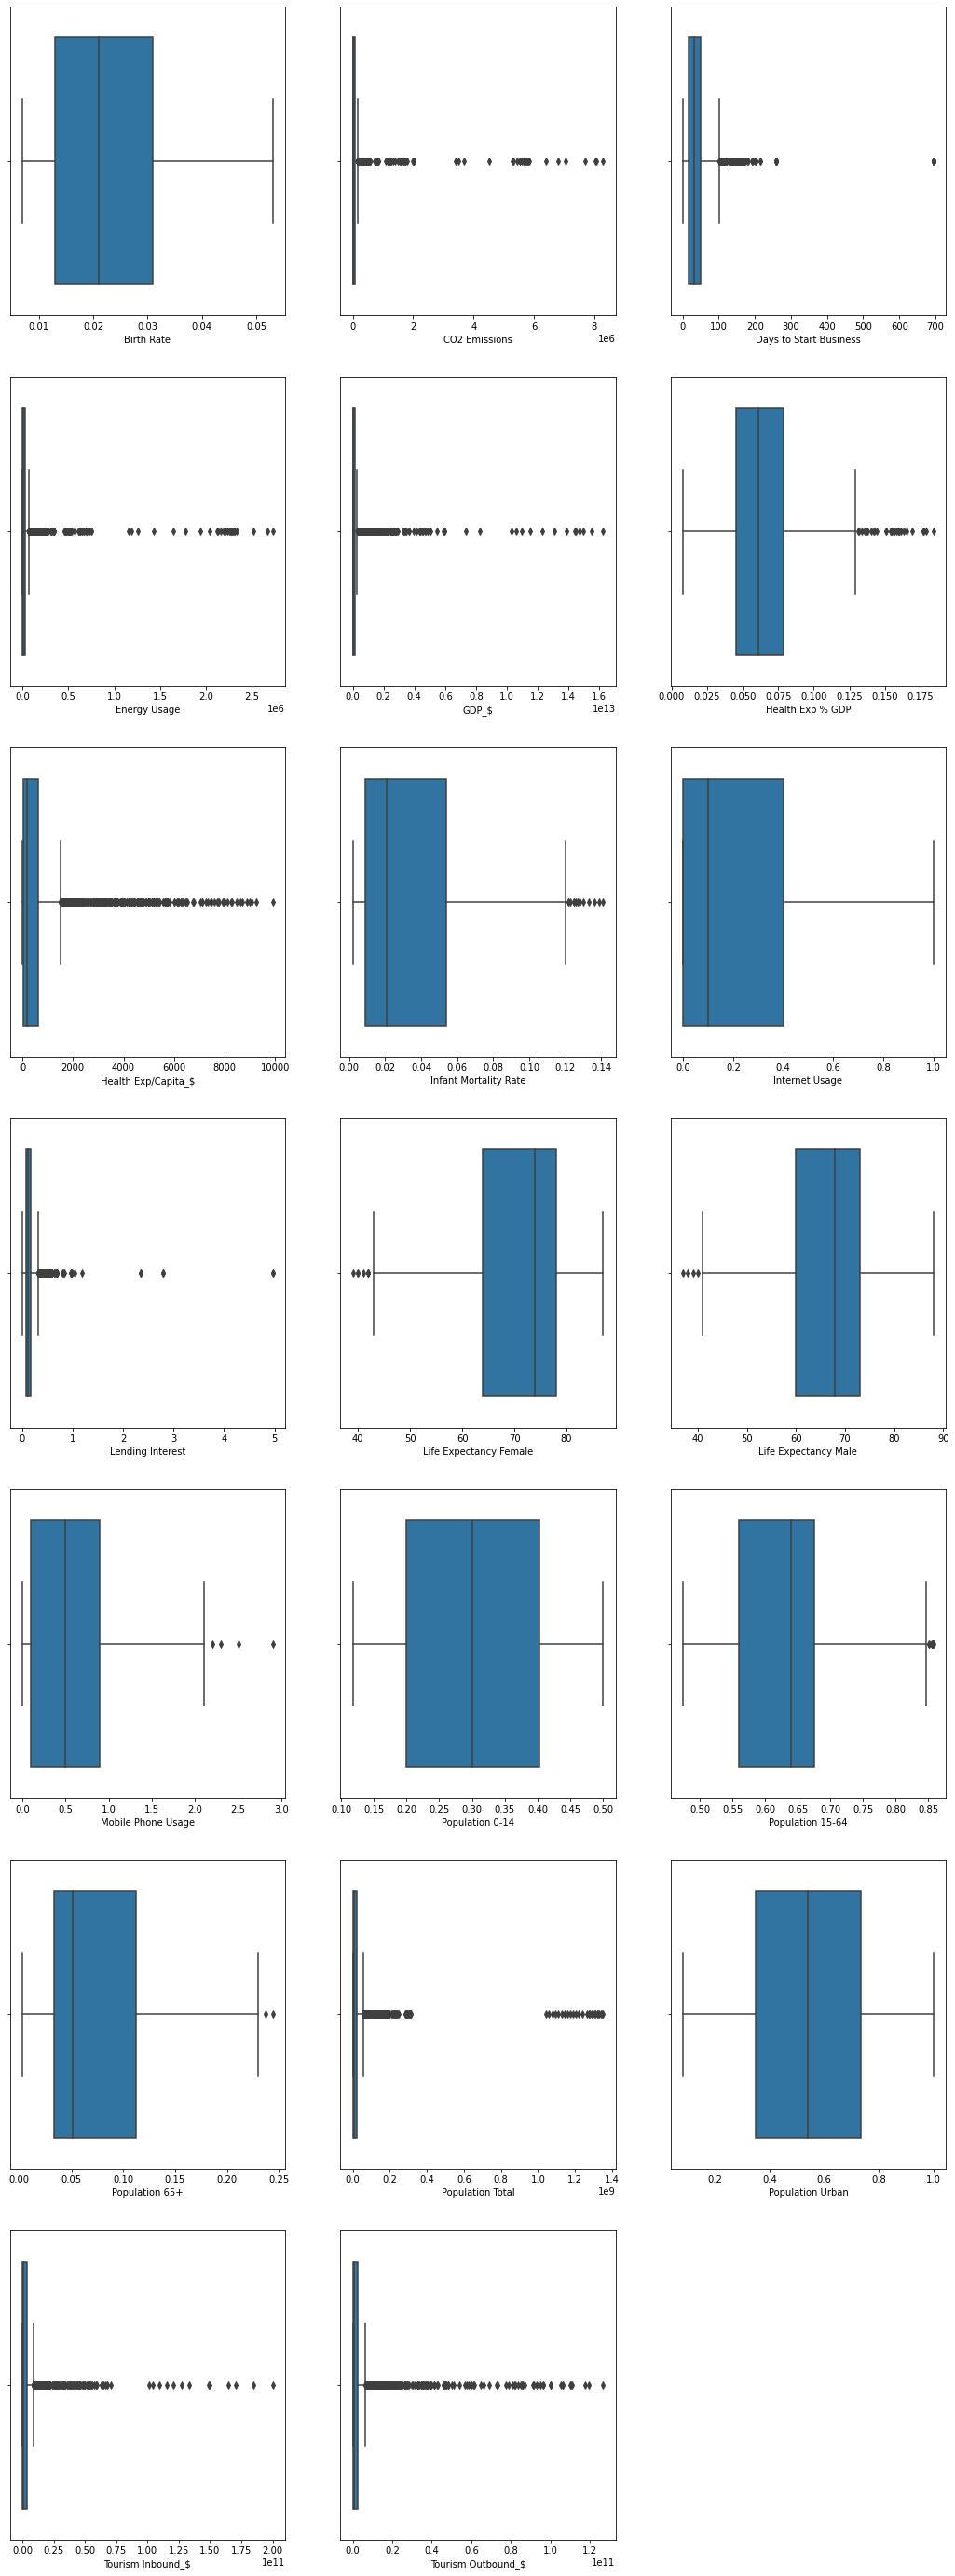

In [106]:
plt.figure(figsize=(18,50))
i = 1

for col in data.columns[0:20]:
    plt.subplot(7,3,i)
    sns.boxplot(data[col]) 
    i = i + 1
# we see large number of outliers, deleting them can result in loss of imp info.. so we retain them

## 1) CO2 Emissions

In [107]:
list = []
list1 = []
for country in data['Country'].unique():
    
    mean = data[data['Country'] == country]['CO2 Emissions'].mean()
    list1.append(mean)
    list.append(country)
   

In [108]:
df_co2 = pd.DataFrame()
df_co2['Country'] = list
df_co2['Avg. CO2 emissions'] = list1 
df_co2['CO2 emissions in %'] = df_co2['Avg. CO2 emissions']/ sum(df_co2['Avg. CO2 emissions'])  * 100 

df_co2 = df_co2.sort_values(by=['Avg. CO2 emissions'], ascending=False) 
df_co2 = df_co2.reset_index()
df_co2.drop(columns=['index'], inplace=True) 
df_co2 # countries listed according ti their avg CO2 emissions 

,Country,Avg. CO2 emissions,CO2 emissions in %
0,China,6.039680e+06,21.555564
1,United States,5.638006e+06,20.121994
2,Russian Federation,1.639776e+06,5.852346
3,India,1.583216e+06,5.650484
4,Japan,1.202349e+06,4.291172
...,...,...,...
177,Comoros,1.132248e+02,0.000404
178,Vanuatu,8.823077e+01,0.000315
179,Sao Tome and Principe,7.756154e+01,0.000277
180,Kiribati,6.250497e+01,0.000223


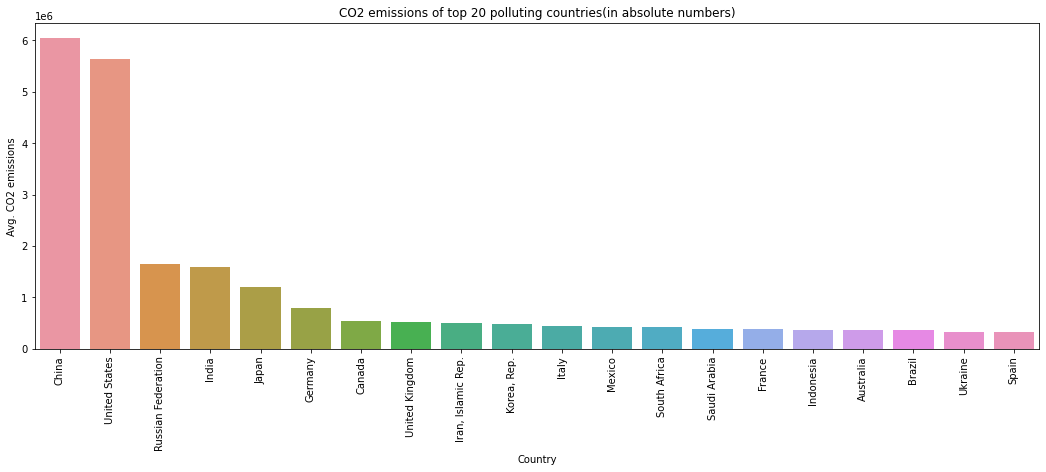

In [109]:
plt.figure(figsize=(18,6))
sns.barplot(x=df_co2['Country'].head(20), y=df_co2['Avg. CO2 emissions'].head(20))
plt.xticks(rotation = 90) 
plt.title('CO2 emissions of top 20 polluting countries(in absolute numbers)') 
plt.show() 

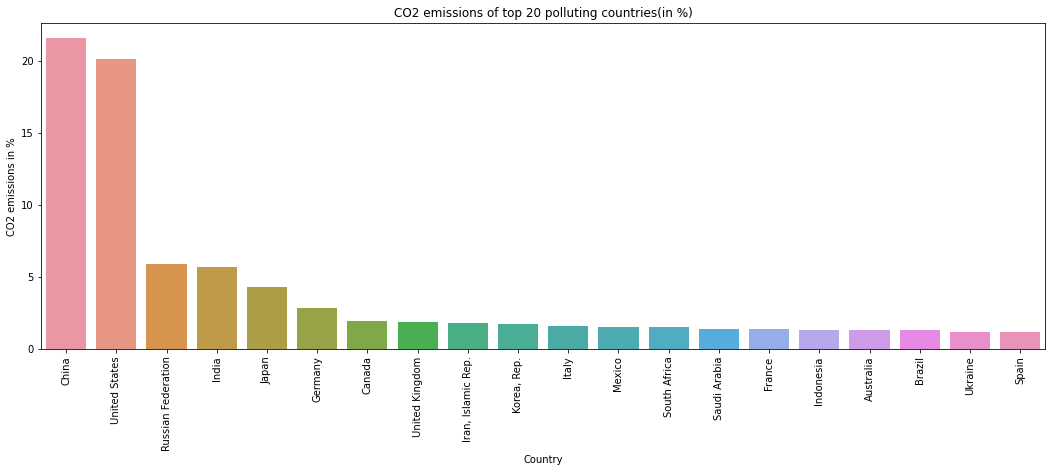

In [110]:
plt.figure(figsize=(18,6))
sns.barplot(x=df_co2['Country'].head(20), y=df_co2['CO2 emissions in %'].head(20))
plt.xticks(rotation = 90) 
plt.title('CO2 emissions of top 20 polluting countries(in %)') 
plt.show() 

### Insight: China, USA, Russia, India accounts for 50% of CO2 emissions of the world 

## 2) GDP

In [111]:
list = []
list1 = []
for country in data['Country'].unique():
    
    mean = data[data['Country'] == country]['GDP_$'].mean()
    list1.append(mean)
    list.append(country)
   
   

In [112]:
df_gdp = pd.DataFrame()
df_gdp['Country'] = list
df_gdp['Avg. GDP'] = list1 
df_gdp['GDP in %'] = df_gdp['Avg. GDP']/ sum(df_gdp['Avg. GDP'])  * 100 

df_gdp = df_gdp.sort_values(by=['Avg. GDP'], ascending=False) 
df_gdp = df_gdp.reset_index()
df_gdp.drop(columns=['index'], inplace=True) 
df_gdp # countries listed according t0 their avg gdp  

,Country,Avg. GDP,GDP in %
0,United States,1.330715e+13,26.326022
1,Japan,4.795284e+12,9.486689
2,China,3.615967e+12,7.153601
3,Germany,2.861328e+12,5.660672
4,United Kingdom,2.190205e+12,4.332964
...,...,...,...
177,Comoros,4.177087e+08,0.000826
178,Tonga,2.905719e+08,0.000575
179,"Micronesia, Fed. Sts.",2.636554e+08,0.000522
180,Sao Tome and Principe,1.496316e+08,0.000296


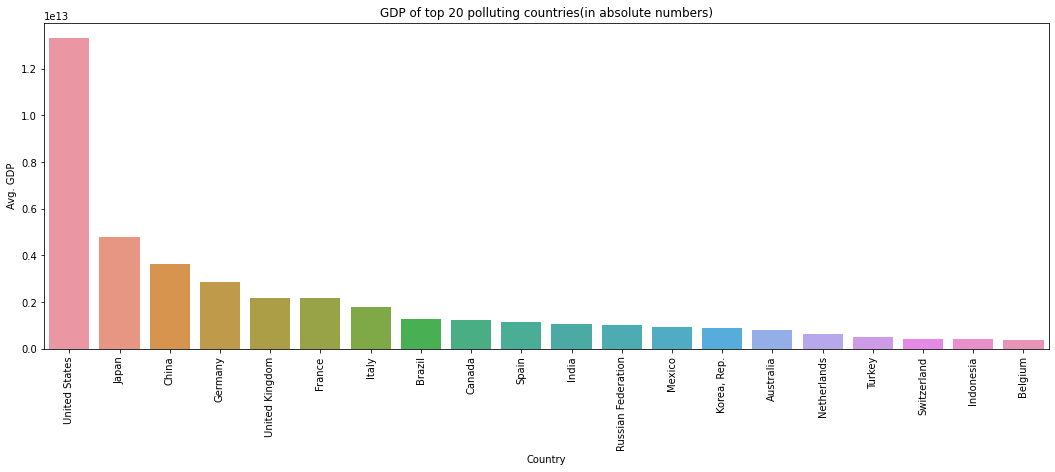

In [113]:
plt.figure(figsize=(18,6))
sns.barplot(x=df_gdp['Country'].head(20), y=df_gdp['Avg. GDP'].head(20))
plt.xticks(rotation = 90) 
plt.title('GDP of top 20 polluting countries(in absolute numbers)') 
plt.show() 

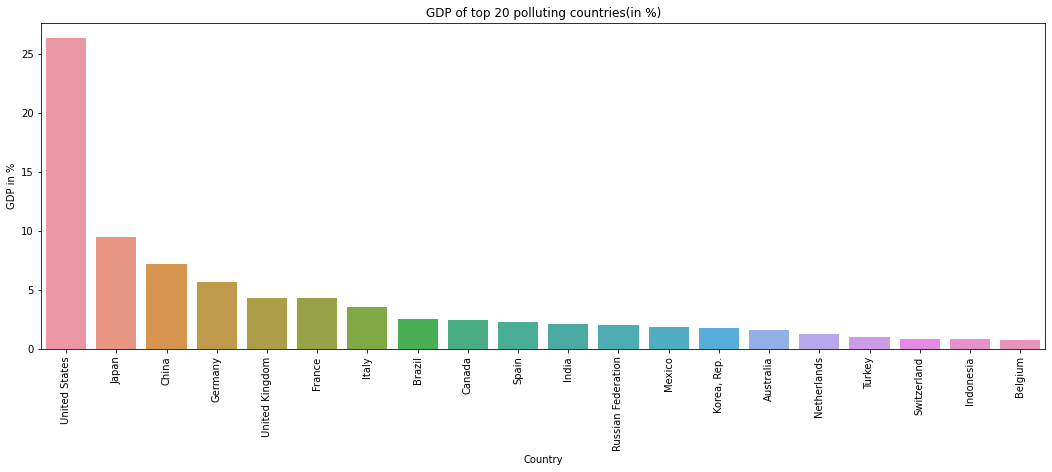

In [114]:
plt.figure(figsize=(18,6))
sns.barplot(x=df_gdp['Country'].head(20), y=df_gdp['GDP in %'].head(20))
plt.xticks(rotation = 90) 
plt.title('GDP of top 20 polluting countries(in %)') 
plt.show() 

### Insight: GDP of USA is so huge that it is comparable to GDP of Japan, China, Germany, UK combined

## 3) Birth Rate and Infant Mortality Rate

In [115]:
list = []
list1 = []
list2 = []

for country in data['Country'].unique():
    
    mean = data[data['Country'] == country]['Birth Rate'].mean()
    mean1 = data[data['Country'] == country]['Infant Mortality Rate'].mean()
    list.append(country)
    list1.append(mean)
    list2.append(mean1)
    
   

In [116]:
df_imr = pd.DataFrame()
df_imr['Country'] = list
df_imr['Avg. birth rate'] = list1 
df_imr['Avg. IMR'] = list2 

df_imr = df_imr.sort_values(by=['Avg. IMR'], ascending = True) 
df_imr = df_imr.reset_index()
df_imr.drop(columns=['index'], inplace=True) 
df_imr # countries listed according t0 their avg imr  

,Country,Avg. birth rate,Avg. IMR
0,Singapore,0.010385,0.002308
1,Iceland,0.014538,0.002385
2,Luxembourg,0.011769,0.002692
3,Japan,0.008769,0.002692
4,Sweden,0.011385,0.002846
...,...,...,...
177,Chad,0.049000,0.099077
178,"Congo, Dem. Rep.",0.045538,0.102308
179,Central African Republic,0.036769,0.107923
180,Angola,0.048308,0.118154


In [117]:
# sns.scatterplot(df_imr['Avg. birth rate'], df_imr['Avg. IMR'], hue=df_imr['Country']) 
#this graph becomes messy so lets visualise for top 10 and bottom 10 countries

In [118]:
df_imr_top_bottom = df_imr.head(10) 
df_imr_top_bottom = df_imr_top_bottom.append(df_imr.tail(10))

<AxesSubplot: xlabel='Avg. birth rate', ylabel='Avg. IMR'>

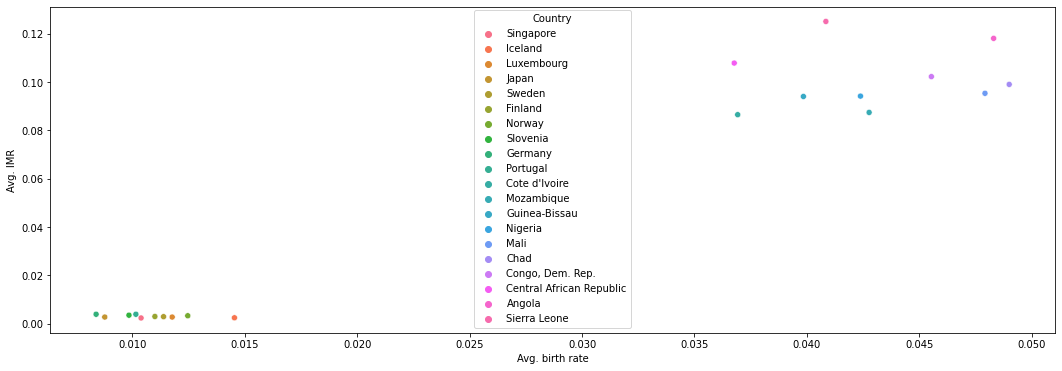

In [119]:
plt.figure(figsize=(18,6)) 
sns.scatterplot(df_imr_top_bottom['Avg. birth rate'], df_imr_top_bottom['Avg. IMR'], hue=df_imr_top_bottom['Country'])

### Insight: Countries like Singapore, Iceland, Luxmeborug, Japan, and nordic countries have highest standards of population health, where as african countries like Cote d'Ivoire, Mali, Nigeria, Chad, Congo etc severely lack health facilities

## 4) Health Status 

In [120]:
list = []
list1 = []
list2 = []

for country in data['Country'].unique():
    
    mean = data[data['Country'] == country]['Life Expectancy Male'].mean()
    mean1 = data[data['Country'] == country]['Life Expectancy Female'].mean()
    list.append(country)
    list1.append(mean)
    list2.append(mean1)
    
   

In [121]:
df_life_exp = pd.DataFrame()
df_life_exp['Country'] = list
df_life_exp['Life Expectancy Male'] = list1 
df_life_exp['Life Expectancy Female'] = list2 

df_life_exp = df_life_exp.sort_values(by=['Life Expectancy Female'], ascending = False) 
df_life_exp = df_life_exp.reset_index()
df_life_exp.drop(columns=['index'], inplace=True) 
df_life_exp # countries listed according t0 their avg life_exp  

,Country,Life Expectancy Male,Life Expectancy Female
0,Japan,78.923077,85.615385
1,"Hong Kong SAR, China",79.230769,85.384615
2,France,77.230769,84.384615
3,Italy,78.461538,84.153846
4,Spain,77.692308,84.000000
...,...,...,...
177,Botswana,47.076923,47.538462
178,Zimbabwe,47.615385,47.461538
179,Swaziland,47.307692,47.230769
180,Lesotho,45.538462,46.000000


In [122]:
df_life_exp_top_bottom = df_life_exp.head(10) 
df_life_exp_top_bottom = df_life_exp_top_bottom.append(df_life_exp.tail(10))

<AxesSubplot: xlabel='Life Expectancy Male', ylabel='Life Expectancy Female'>

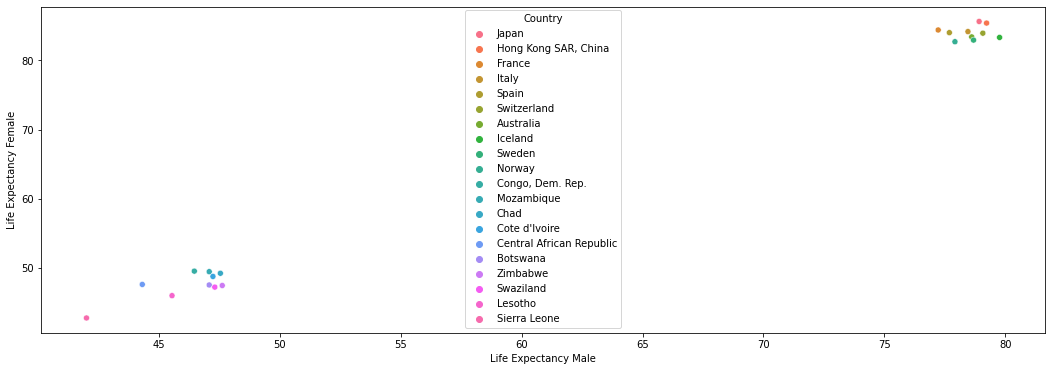

In [123]:
plt.figure(figsize=(18,6)) 
sns.scatterplot(df_life_exp_top_bottom['Life Expectancy Male'], df_life_exp_top_bottom['Life Expectancy Female'], hue=df_life_exp_top_bottom['Country'])

### Insight: Countries like Japan, Hong KOng, France, Italy, Spain etc have high standards of living whereas countries like Congo, Chad, Botswana, Zimabwe etc are engulfed in poverty which gives rise to poor health and living standards which unltimately results into lesser life expectancy

In [124]:
list = []
list1 = []

for country in data['Country'].unique():
    
    mean = data[data['Country'] == country]['Health Exp/Capita_$'].mean()
    list.append(country)
    list1.append(mean) 

In [125]:
df_health_expd = pd.DataFrame()
df_health_expd['Country'] = list
df_health_expd['Health Exp/Capita_$'] = list1 


df_health_expd = df_health_expd.sort_values(by=['Health Exp/Capita_$'], ascending = False) 
df_health_expd = df_health_expd.reset_index()
df_health_expd.drop(columns=['index'], inplace=True) 
df_health_expd # countries listed according t0 their avg health_expd   

,Country,Health Exp/Capita_$
0,United States,6967.384615
1,Norway,6752.615385
2,Luxembourg,6330.615385
3,Switzerland,6135.615385
4,Denmark,4910.615385
...,...,...
177,Burundi,13.230769
178,"Congo, Dem. Rep.",10.846154
179,Ethiopia,9.923077
180,Eritrea,8.692308


In [126]:
df_health_expd_top_bottom = df_health_expd.head(10) 
df_health_expd_top_bottom = df_health_expd_top_bottom .append(df_health_expd.tail(10)) 

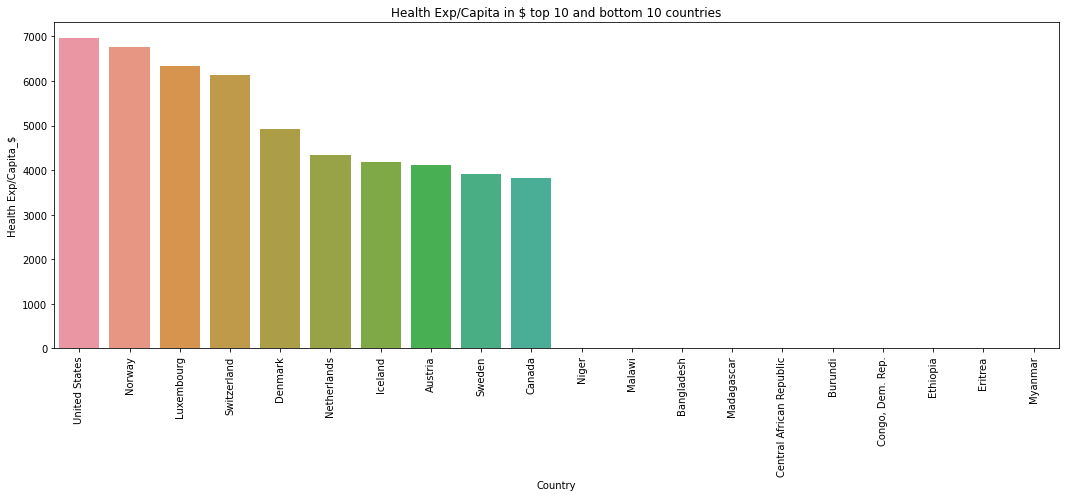

In [127]:
plt.figure(figsize=(18,6))
sns.barplot(df_health_expd_top_bottom['Country'] , df_health_expd_top_bottom['Health Exp/Capita_$'])
plt.xticks(rotation = 90) 
plt.title('Health Exp/Capita in $ top 10 and bottom 10 countries') 
plt.show()

### Insight: Health Expenditure is the financial resources that a country devotes to health care, both for individuals and for the population as a whole. It indicates government and total expenditure on health resources, access and services and nutrition. African countries severely lack on this parameter, which results in low health status of their citizens

## 5) Demography 

In [128]:
list = []
list1 = []
list2 = []
list3 = []

for country in data['Country'].unique():
    
    mean1 = data[data['Country'] == country]['Population 0-14'].mean()
    mean2 = data[data['Country'] == country]['Population 15-64'].mean()
    mean3 = data[data['Country'] == country]['Population 65+'].mean()
    list.append(country)
    list1.append(mean1)
    list2.append(mean2)
    list3.append(mean3)

In [129]:
df_demo = pd.DataFrame()
df_demo['Country'] = list
df_demo['Population 0-14'] = list1
df_demo['Population 15-64'] = list2 
df_demo['Population 65+'] = list3
df_demo.head() 

,Country,Population 0-14,Population 15-64,Population 65+
0,Algeria,0.292692,0.663077,0.044231
1,Angola,0.477538,0.498154,0.024462
2,Benin,0.442615,0.528846,0.028538
3,Botswana,0.356769,0.610769,0.032615
4,Burkina Faso,0.463385,0.510846,0.025692


In [130]:
df_demo_15 = df_demo.sort_values(by=['Population 15-64'], ascending = False) #dataframe arranged by population 15-64 column
df_demo_15 = df_demo_15.reset_index()
df_demo_15.drop(columns=['index'], inplace=True) 
df_demo_15.head() 

,Country,Population 0-14,Population 15-64,Population 65+
0,United Arab Emirates,0.188769,0.804308,0.006692
1,Qatar,0.204538,0.782308,0.013231
2,"Macao SAR, China",0.166769,0.760077,0.073154
3,"Hong Kong SAR, China",0.140385,0.737154,0.122308
4,Singapore,0.189000,0.727000,0.083769


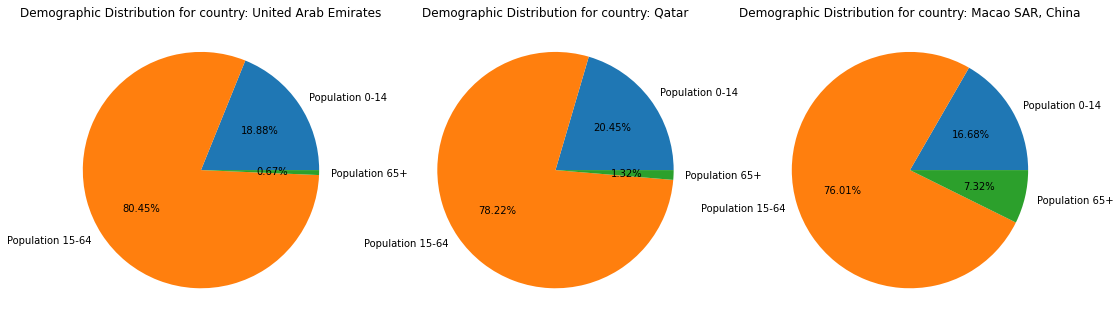

In [131]:
# Demographic composition of countries having high population in age group 14-65(ie working population)

plt.figure(figsize=(18,12))


plt.subplot(1,3,1)
plt.pie(df_demo_15.iloc[0,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country: United Arab Emirates') 


plt.subplot(1,3,2)
plt.pie(df_demo_15.iloc[1,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country: Qatar') 

plt.subplot(1,3,3)
plt.pie(df_demo_15.iloc[2,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country: Macao SAR, China') 
plt.show() 


### Insight: UAE, Qatar, Macao, HOng kong has almost 80% of population as workforce which signifies their   'demographic dividend' (though large proportion of their workforce are immigrants) 

In [132]:
df_demo_65 = df_demo.sort_values(by=['Population 65+'], ascending = False) #dataframe arranged by population 65+ column
df_demo_65 = df_demo_65.reset_index()
df_demo_65.drop(columns=['index'], inplace=True) 
df_demo_65.head() 

,Country,Population 0-14,Population 15-64,Population 65+
0,Japan,0.137538,0.656769,0.205692
1,Italy,0.141077,0.662385,0.196462
2,Germany,0.142308,0.666462,0.191154
3,Greece,0.146077,0.670077,0.184077
4,Sweden,0.173000,0.650462,0.176538


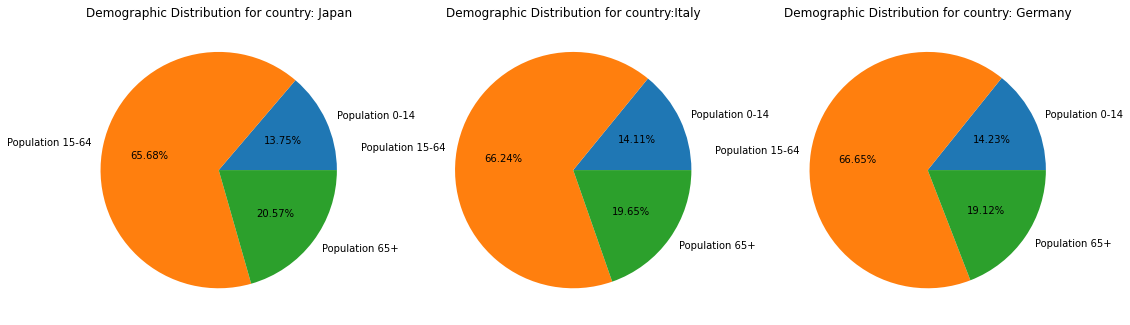

In [133]:
# Demographic composition of countries having high population in age group 65+(ie aged population)

plt.figure(figsize=(18,12))


plt.subplot(1,3,1)
plt.pie(df_demo_65.iloc[0,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country: Japan') 


plt.subplot(1,3,2)
plt.pie(df_demo_65.iloc[1,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country:Italy') 

plt.subplot(1,3,3)
plt.pie(df_demo_65.iloc[2,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country: Germany') 
plt.show() 


### Insight: Japan, Italy, Germany has largest proportion of aged population, it results in supply shortage of human resources and increases health expenditure on elderly

In [134]:
df_demo_14 = df_demo.sort_values(by=['Population 0-14'], ascending = False) #dataframe arranged by population 0-14 column
df_demo_14 = df_demo_14.reset_index()
df_demo_14.drop(columns=['index'], inplace=True) 
df_demo_14.head() 

,Country,Population 0-14,Population 15-64,Population 65+
0,Uganda,0.491462,0.483462,0.025231
1,Niger,0.491000,0.483538,0.025385
2,Afghanistan,0.490308,0.488769,0.020769
3,Chad,0.490231,0.483462,0.026308
4,Timor-Leste,0.481769,0.490308,0.028077


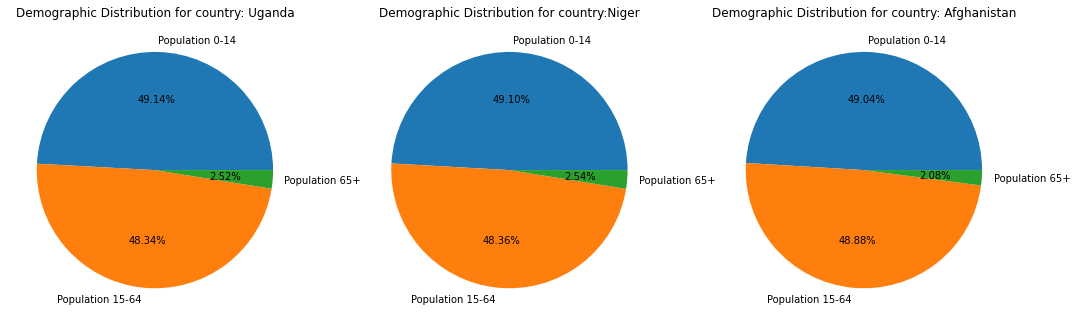

In [135]:
# Demographic composition of countries having high population in age group 0-14 (ie aged population)

plt.figure(figsize=(18,12))


plt.subplot(1,3,1)
plt.pie(df_demo_14.iloc[0,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country: Uganda') 


plt.subplot(1,3,2)
plt.pie(df_demo_14.iloc[1,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country:Niger') 

plt.subplot(1,3,3)
plt.pie(df_demo_14.iloc[2,1:4], labels=['Population 0-14', 'Population 15-64', 'Population 65+'], autopct='%1.2f%%')
plt.title('Demographic Distribution for country: Afghanistan') 
plt.show() 


### Insights: Uganda, Niger and afghanistan has largest proportion of population in age group 0-14. This indicates almost 50% of their population is economically unproductive and are considered as liabilities. This segment of population demands huge expenditure on their health and education.

### Uganda, Niger, afghanistan have proportion of aged people  below 3%. This indicates low life expectancy :(

In [136]:
list = []
list1 = []
for country in data['Country'].unique():
    
    mean = data[data['Country'] == country]['Population Total'].mean()
    list1.append(mean)
    list.append(country) 

In [137]:
df_pop = pd.DataFrame()
df_pop['Country'] = list
df_pop['Avg. Total Population'] = list1 
df_pop['Pop in %'] = df_pop['Avg. Total Population']/ sum(df_pop['Avg. Total Population'])  * 100 

df_pop = df_pop.sort_values(by=['Pop in %'], ascending=False) 
df_pop = df_pop.reset_index()
df_pop.drop(columns=['index'], inplace=True) 
df_pop # countries listed according t0 their population  

,Country,Avg. Total Population,Pop in %
0,China,1.309265e+09,20.158786
1,India,1.141591e+09,17.577104
2,United States,2.983420e+08,4.593580
3,Indonesia,2.278172e+08,3.507707
4,Brazil,1.874586e+08,2.886305
...,...,...,...
177,Tonga,1.015786e+05,0.001564
178,Aruba,9.886608e+04,0.001522
179,Kiribati,9.183538e+04,0.001414
180,Seychelles,8.489492e+04,0.001307


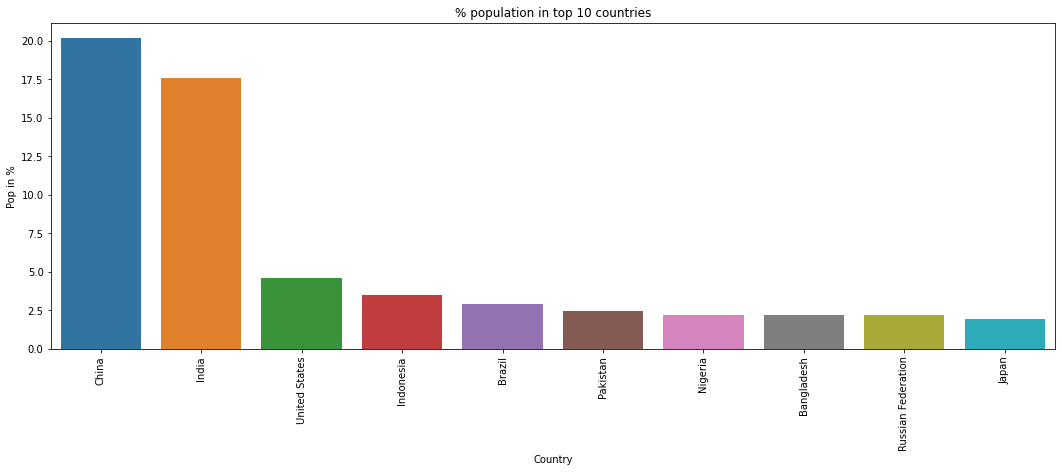

In [138]:
plt.figure(figsize=(18,6))
sns.barplot(df_pop.head(10)['Country'] , df_pop.head(10)['Pop in %'])
plt.xticks(rotation = 90) 
plt.title('% population in top 10 countries') 
plt.show()

### Insight: India and China combined  has almost 40% of worlds population. Such a large population with suitable skillsets can be turned into engines of economy. 

## 6) Technological advancement 

In [139]:
list = []
list1 = []

for country in data['Country'].unique():
    
    mean1 = data[data['Country'] == country]['Internet Usage'].mean()
    list.append(country)
    list1.append(mean1)

In [140]:
df_tech = pd.DataFrame()
df_tech['Country'] = list
df_tech['Internet Usage'] = list1

df_tech = df_tech.sort_values(by=['Internet Usage'], ascending = False) 
df_tech = df_tech.reset_index()
df_tech.drop(columns=['index'], inplace=True) 
df_tech # countries listed according to their tech advancement  

,Country,Internet Usage
0,Iceland,0.815385
1,Norway,0.800000
2,Sweden,0.792308
3,Denmark,0.776923
4,Netherlands,0.753846
...,...,...
177,Mozambique,0.000000
178,Sierra Leone,0.000000
179,Niger,0.000000
180,Papua New Guinea,0.000000


In [141]:
df_tech_top_bottom = df_tech.head(10) 
df_tech_top_bottom =df_tech_top_bottom.append(df_tech.tail(10))

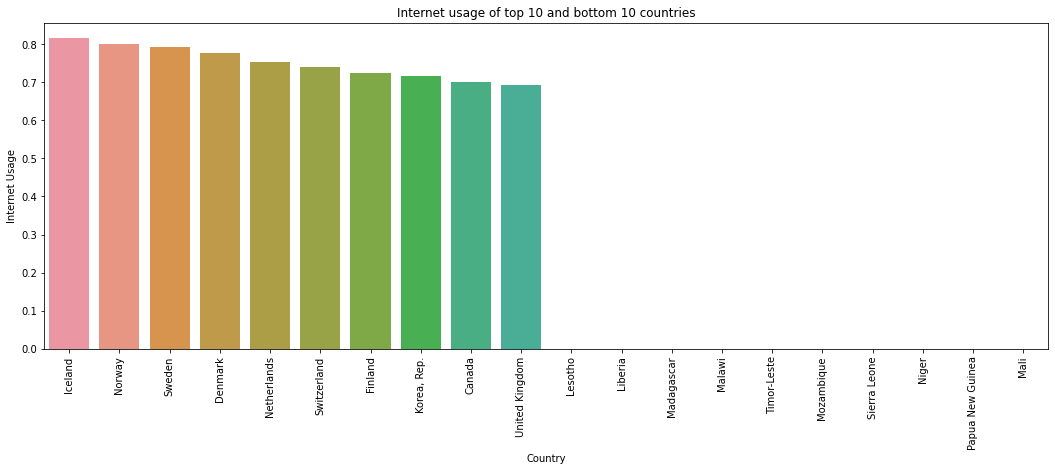

In [142]:
plt.figure(figsize=(18,6))
sns.barplot(df_tech_top_bottom['Country'] , df_tech_top_bottom['Internet Usage'])
plt.xticks(rotation = 90) 
plt.title('Internet usage of top 10 and bottom 10 countries') 
plt.show()

### Insight: Nordic countries, Canada, Korea top in terms of technological advancements whereas african countries like Mali, Niger, Mozambique, lack internet connectivity

## 7) Ease of doing Business

In [143]:
list = []
list1 = []

for country in data['Country'].unique():
    
    mean1 = data[data['Country'] == country]['Days to Start Business'].mean()
    list.append(country)
    list1.append(mean1)

In [144]:
df_biz = pd.DataFrame()
df_biz['Country'] = list
df_biz['Days to Start Business'] = list1

df_biz = df_biz.sort_values(by=['Days to Start Business'], ascending = True) 
df_biz = df_biz.reset_index()
df_biz.drop(columns=['index'], inplace=True) 
df_biz # countries listed according to their ease of business

,Country,Days to Start Business
0,Australia,3.000000
1,Canada,3.769231
2,Iceland,5.000000
3,United States,5.615385
4,Singapore,5.615385
...,...,...
177,"Venezuela, RB",141.230769
178,Timor-Leste,146.931295
179,Haiti,178.538462
180,Guinea-Bissau,213.923077


In [145]:
df_biz_top_bottom = df_biz.head(10) 
df_biz_top_bottom =df_biz_top_bottom.append(df_biz.tail(10))

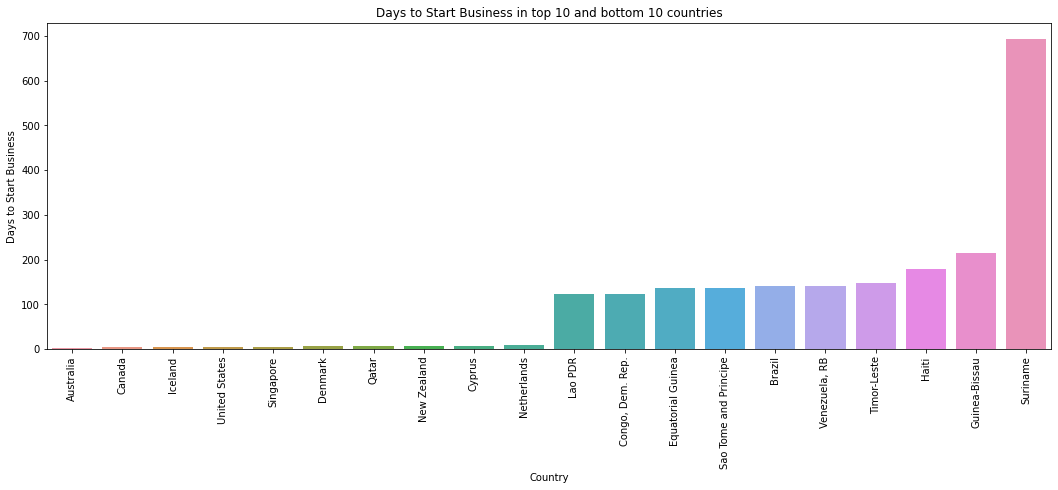

In [146]:
plt.figure(figsize=(18,6))
sns.barplot(df_biz_top_bottom['Country'] , df_biz_top_bottom['Days to Start Business'])
plt.xticks(rotation = 90) 
plt.title('Days to Start Business in top 10 and bottom 10 countries') 
plt.show()

### Insight: Countries like Australia, Canada, Iceland, US indicates political stability, Infrastructural advancement, stable financial system. Whereas, huge time taken in Suriname, Guinea-bissau, Haiti indicates political instability, red-tapism, infertile atmosphere for entrepreneurial spirit

In [147]:
list = []
list1 = []

for country in data['Country'].unique():
    
    mean1 = data[data['Country'] == country]['Lending Interest'].mean()
    list.append(country)
    list1.append(mean1)

In [148]:
df_loan = pd.DataFrame()
df_loan['Country'] = list
df_loan['Lending Interest'] = list1
df_loan['Lending Interest'] = df_loan['Lending Interest'] * 100

df_loan = df_loan.sort_values(by=['Lending Interest'], ascending = True) 
df_loan = df_loan.reset_index()
df_loan.drop(columns=['index'], inplace=True) 
df_loan # countries listed according to their ease of business

,Country,Lending Interest
0,Japan,1.769231
1,Portugal,2.194264
2,Luxembourg,2.197134
3,Austria,2.199779
4,Cuba,2.250000
...,...,...
177,"Congo, Dem. Rep.",46.915447
178,Brazil,50.900000
179,Angola,51.230769
180,Zimbabwe,106.585758


In [149]:
df_loan_top_bottom = df_loan.head(10) 
df_loan_top_bottom =df_loan_top_bottom.append(df_loan.tail(10))

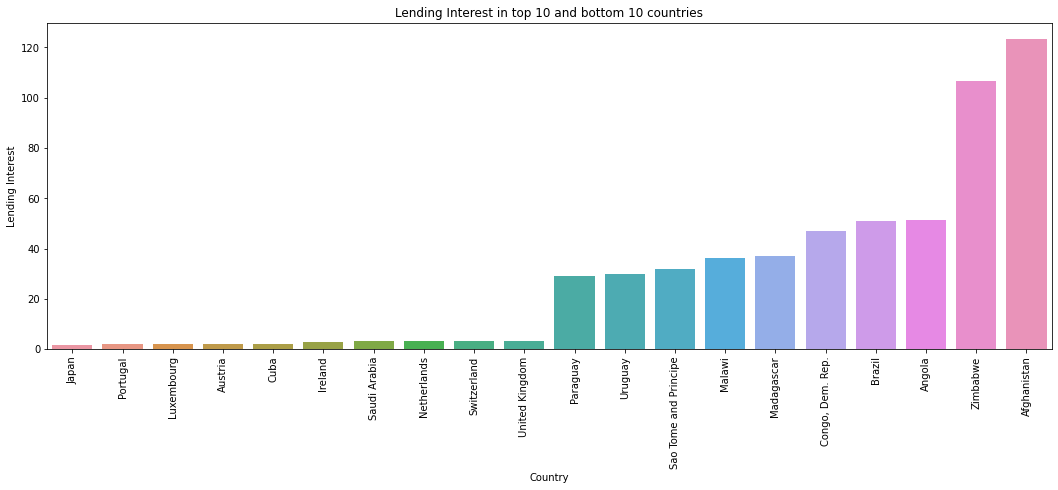

In [150]:
plt.figure(figsize=(18,6))
sns.barplot(df_loan_top_bottom['Country'] , df_loan_top_bottom['Lending Interest'])
plt.xticks(rotation = 90) 
plt.title('Lending Interest in top 10 and bottom 10 countries') 
plt.show()

### Insight: Japan, Portugal, Luxembourg, Austria etc have lowest Lending Interest which results in more loan demands, more investments, more returns, more growth. Whereas high and volatile Lending Interest of Afghanistan, zimbabwe, angola, brazil indicates fragile financial system and infertile atmostphere for investments and growth. 

## 8) Urbanisation

In [151]:
list = []
list1 = []

for country in data['Country'].unique():
    
    mean1 = data[data['Country'] == country]['Population Urban'].mean()
    list.append(country)
    list1.append(mean1)

In [152]:
df_urban = pd.DataFrame()
df_urban['Country'] = list
df_urban['Population Urban'] = list1

df_urban = df_urban.sort_values(by=['Population Urban'], ascending = False) 
df_urban = df_urban.reset_index()
df_urban.drop(columns=['index'], inplace=True) 
df_urban # countries listed according to their urbanisation 

,Country,Population Urban
0,"Macao SAR, China",1.000000
1,"Hong Kong SAR, China",1.000000
2,Singapore,1.000000
3,Kuwait,0.982000
4,Qatar,0.976846
...,...,...
177,Malawi,0.151615
178,Uganda,0.134077
179,Papua New Guinea,0.130923
180,Trinidad and Tobago,0.097462


In [153]:
df_urban_top_bottom = df_urban.head(10) 
df_urban_top_bottom =df_urban_top_bottom.append(df_urban.tail(10))

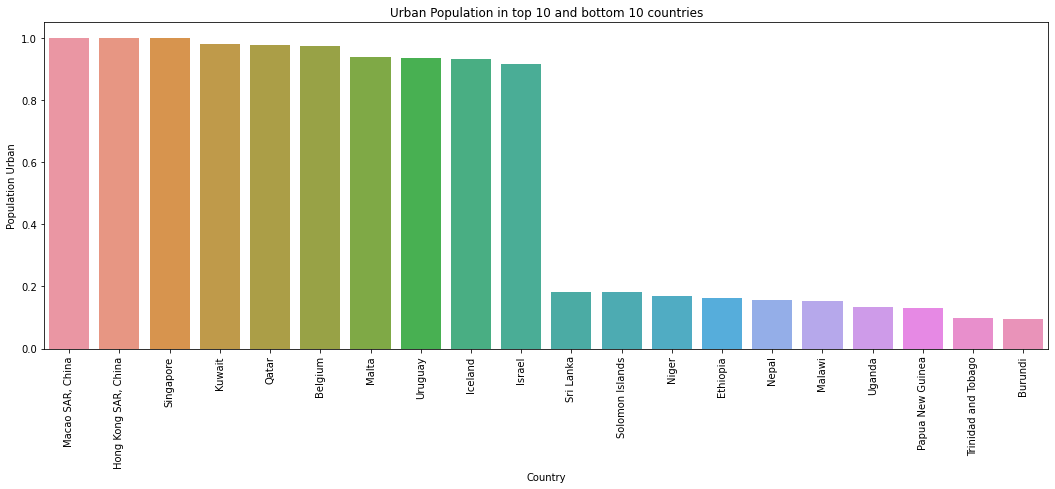

In [154]:
plt.figure(figsize=(18,6))
sns.barplot(df_urban_top_bottom['Country'] , df_urban_top_bottom['Population Urban'])
plt.xticks(rotation = 90) 
plt.title('Urban Population in top 10 and bottom 10 countries') 
plt.show()

### Insight: Urbanization refers to the population shift from rural to urban areas, and corresponding decrease in the proportion of people living in rural areas.  It takes place due to Employment opportunities, educational institutions and urban lifestyle and health facilities in cities. Usually urbanised countries are considered as industrialised countries because both urbanisation and industrialisation happens hand in hand.  

### Macao, Hong kong, Singapore, Kuwait, Qatar, Belguim are fully urbanised countries, whereas Burundi, Malawi, Uganda, Papua New Guinea, Trinidad and Tobago have almost 80-85% population living in rural areas, which indicates their slow pace of life and economic development. 

## 9) Revenue from Tourism

In [155]:
list = []
list1 = []

for country in data['Country'].unique():
    
    mean1 = data[data['Country'] == country]['Tourism Inbound_$'].mean()
    list.append(country)
    list1.append(mean1)

In [156]:
df_revenue = pd.DataFrame()
df_revenue['Country'] = list
df_revenue['Tourism Inbound_$'] = list1

df_revenue = df_revenue.sort_values(by=['Tourism Inbound_$'], ascending = False) 
df_revenue = df_revenue.reset_index()
df_revenue.drop(columns=['index'], inplace=True) 
df_revenue # countries listed according to their revenue from tourism  

,Country,Tourism Inbound_$
0,United States,1.408008e+11
1,France,5.366615e+10
2,Spain,5.319662e+10
3,Germany,4.097346e+10
4,United Kingdom,3.851877e+10
...,...,...
177,Central African Republic,7.460957e+06
178,"Congo, Dem. Rep.",5.921964e+06
179,Guinea,5.078995e+06
180,Papua New Guinea,4.604186e+06


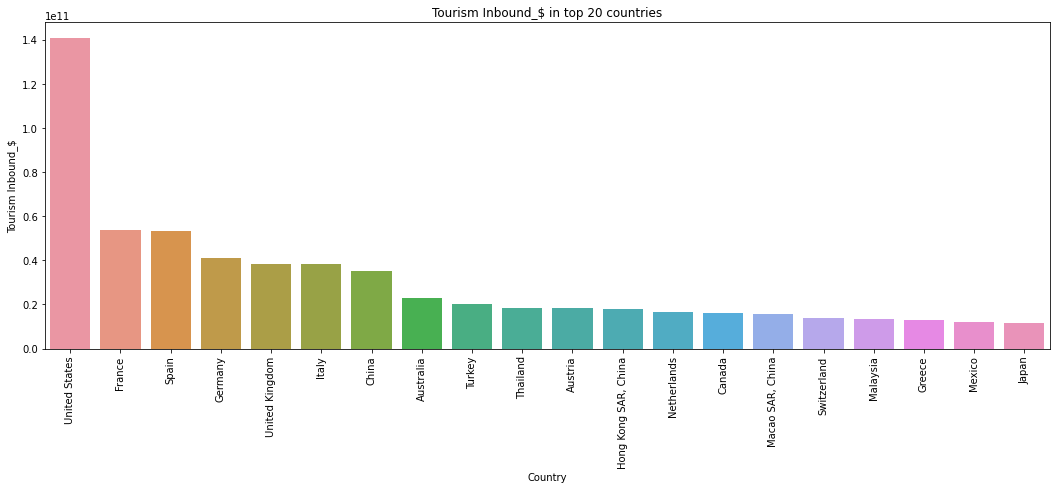

In [157]:
plt.figure(figsize=(18,6))
sns.barplot(df_revenue['Country'].head(20) , df_revenue['Tourism Inbound_$'].head(20))
plt.xticks(rotation = 90) 
plt.title('Tourism Inbound_$ in top 20 countries') 
plt.show()

### Insight: With exception of Turkey, Thailand and Mexico all remaining 17 countries are developed countries, which indicates preference of tourists 

## 10) Standard of Living(Expenditure on tourism)

In [158]:
list = []
list1 = []

for country in data['Country'].unique():
    
    mean1 = data[data['Country'] == country]['Tourism Outbound_$'].mean()
    list.append(country)
    list1.append(mean1)

In [159]:
df_tourism_expd = pd.DataFrame()
df_tourism_expd['Country'] = list
df_tourism_expd['Tourism Outbound_$'] = list1

df_tourism_expd = df_tourism_expd.sort_values(by=['Tourism Outbound_$'], ascending = False) 
df_tourism_expd = df_tourism_expd.reset_index()
df_tourism_expd.drop(columns=['index'], inplace=True) 
df_tourism_expd # countries listed according to their tourism_expd from tourism  

,Country,Tourism Outbound_$
0,United States,1.024878e+11
1,Germany,8.320438e+10
2,United Kingdom,6.511962e+10
3,France,3.977977e+10
4,Japan,3.958808e+10
...,...,...
177,Grenada,1.030769e+07
178,"Gambia, The",8.137921e+06
179,"Micronesia, Fed. Sts.",6.769231e+06
180,Tajikistan,5.909869e+06


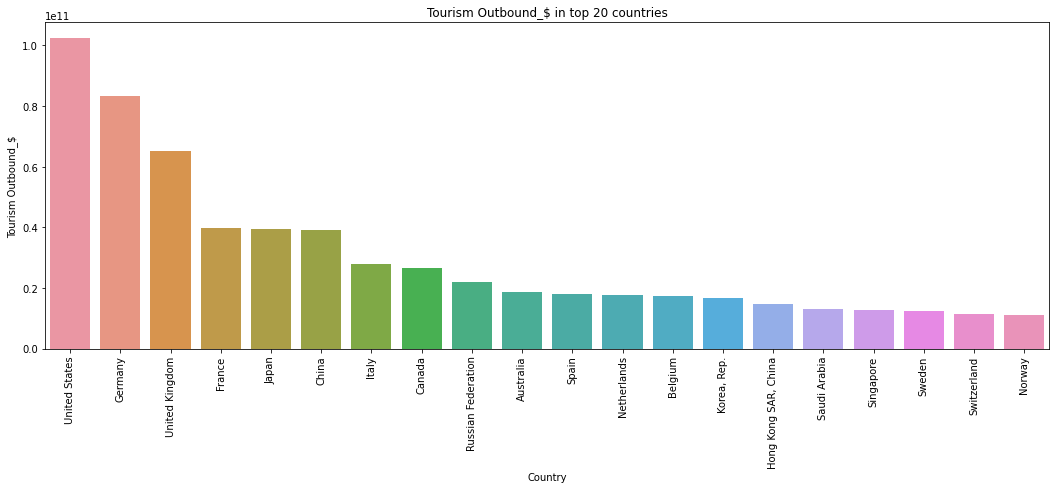

In [160]:
plt.figure(figsize=(18,6))
sns.barplot(df_tourism_expd['Country'].head(20) , df_tourism_expd['Tourism Outbound_$'].head(20))
plt.xticks(rotation = 90) 
plt.title('Tourism Outbound_$ in top 20 countries') 
plt.show()

### Insights: Food, clothes, shelter are considered as fundamental needs of humans, when these need are satisfied then we move towards leisure and entertainment. Tourism is one such recreational activity which people pursue when all their basic needs are satisfied and they have surplus money left. High expenditure on tourism by citizens of US, Germany, UK, France, Japan indicates that living standards of these people are very high. 

# ------

# Data Preprocessing 

Here, We will convert all categorical columns into numeric, and perform feature scaling on all numeric columns

In [161]:
data.info() 
#country is only categorical column -- we ll perform One Hot Encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2366 non-null   float64
 1   CO2 Emissions           2366 non-null   float64
 2   Days to Start Business  2366 non-null   float64
 3   Energy Usage            2366 non-null   float64
 4   GDP_$                   2366 non-null   float64
 5   Health Exp % GDP        2366 non-null   float64
 6   Health Exp/Capita_$     2366 non-null   float64
 7   Infant Mortality Rate   2366 non-null   float64
 8   Internet Usage          2366 non-null   float64
 9   Lending Interest        2366 non-null   float64
 10  Life Expectancy Female  2366 non-null   float64
 11  Life Expectancy Male    2366 non-null   float64
 12  Mobile Phone Usage      2366 non-null   float64
 13  Population 0-14         2366 non-null   float64
 14  Population 15-64        2366 non-null   

### One Hot Encoding

In [162]:
#OHE is not performed because we have deleted Categorical column (country) intself..
#We deleted country column because we dont want countries to group together based on thier names but on their socio-economic indicators
data_wo_country = data.drop(columns=['Country'])

### Feature Scaling

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [164]:
data_norm = scaler.fit_transform(data_wo_country)
data_norm 

array([[2.82608696e-01, 1.06100181e-02, 3.46320346e-02, ...,
        5.63180828e-01, 5.06268888e-04, 1.52244520e-03],
       [2.60869565e-01, 1.01710112e-02, 3.46320346e-02, ...,
        5.71895425e-01, 4.96273451e-04, 1.53034580e-03],
       [2.60869565e-01, 1.09627441e-02, 3.46320346e-02, ...,
        5.80610022e-01, 5.51248355e-04, 1.95697808e-03],
       ...,
       [3.47826087e-01, 1.66712013e-05, 4.32900433e-02, ...,
        3.88888889e-01, 7.06125585e-03, 2.33554284e-03],
       [6.52173913e-02, 6.07970494e-06, 4.32900433e-02, ...,
        3.72549020e-01, 7.06327561e-03, 2.33620678e-03],
       [6.52173913e-02, 3.04269730e-03, 1.19769120e-01, ...,
        7.47276688e-01, 1.30605379e-02, 1.97123703e-02]])

### Principal Component Analysis

The Principal Component Analysis is a popular unsupervised learning technique for reducing the dimensionality of data. It increases interpretability yet, at the same time, it minimizes information loss. It helps to find the most significant features in a dataset and makes the data easy for plotting in 2D.

The number of these PCs are either equal to or less than the original features present in the dataset. Some properties of these principal components are given below:

    The principal component must be the linear combination of the original features.

    These components are orthogonal, i.e., the correlation between a pair of variables is zero.
    
    The importance of each component decreases when going to 1 to n, it means the 1 PC has the most importance, and n PC will have the least  importance. 

In [165]:
from sklearn.decomposition import PCA
pca = PCA() 

In [166]:
data_pca = pca.fit_transform(data_norm)
data_pca 

array([[-1.71872730e-01, -2.66648239e-01, -8.64770566e-02, ...,
         5.68106643e-04,  2.07805018e-03, -4.53494892e-05],
       [-1.30729725e-01, -2.79028020e-01, -7.60621909e-02, ...,
         2.20382243e-03,  1.21045171e-03, -4.80088633e-05],
       [-1.04329300e-01, -2.91652526e-01, -7.30082892e-02, ...,
         3.38939770e-03,  1.42885136e-03, -5.28765578e-05],
       ...,
       [-1.71515663e-01, -3.81263472e-02,  9.23194003e-02, ...,
        -3.52230311e-03,  2.11136093e-03,  2.70495498e-05],
       [ 5.36814171e-01,  1.62462309e-01,  2.09688615e-01, ...,
         7.82427619e-04, -1.04512659e-03, -1.60159501e-03],
       [ 6.36291856e-01, -1.82262039e-01,  5.54608859e-02, ...,
         4.06906733e-03,  1.69132932e-03, -8.79524595e-05]])

In [167]:
var = pca.explained_variance_ratio_ 
var  

array([6.57655285e-01, 8.12795573e-02, 5.97623250e-02, 4.74314777e-02,
       3.95160312e-02, 3.60106541e-02, 1.58644659e-02, 1.38695346e-02,
       1.21237074e-02, 1.02910610e-02, 7.50672098e-03, 6.71550364e-03,
       3.72149646e-03, 2.75366580e-03, 2.53111172e-03, 1.27345412e-03,
       1.07271298e-03, 5.72183704e-04, 4.77562984e-05, 1.29504998e-06])

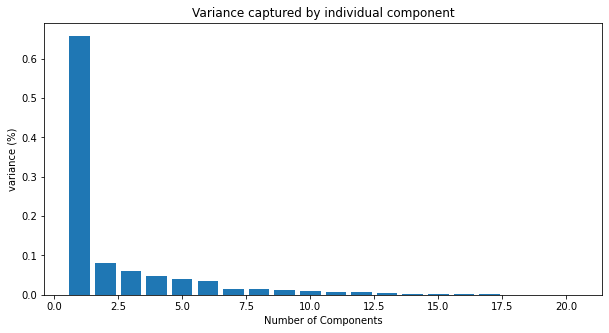

In [168]:
#Variance captured by individual PCs.
plt.figure(figsize=(10,5))
plt.bar(range(1,len(var)+1) , var)

plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Variance captured by individual component')
plt.show()

In [169]:
# Cumulative variance 
var1 = np.cumsum(np.round(var, 4)*100)
var1  

array([ 65.77,  73.9 ,  79.88,  84.62,  88.57,  92.17,  93.76,  95.15,
        96.36,  97.39,  98.14,  98.81,  99.18,  99.46,  99.71,  99.84,
        99.95, 100.01, 100.01, 100.01])

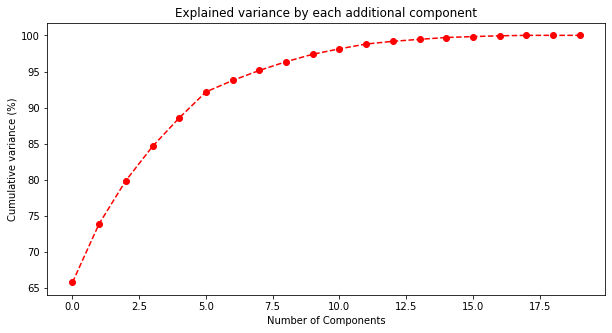

In [170]:
# Commulative Variance plot 
plt.figure(figsize=(10,5))
plt.plot(var1,color="red", linestyle='--', marker='o') 

plt.xlabel('Number of Components')
plt.title('Explained variance by each additional component')
plt.ylabel('Cumulative variance (%)')
plt.show() 

In [171]:
#first 13 PCs
pca = PCA(n_components=13)
data_pca = pca.fit_transform(data_norm)
data_pca

array([[-1.71872730e-01, -2.66648239e-01, -8.64770566e-02, ...,
        -4.30162116e-03,  8.83223189e-03, -8.01595168e-02],
       [-1.30729725e-01, -2.79028020e-01, -7.60621909e-02, ...,
         1.40673020e-03,  1.31297157e-02, -7.30224041e-02],
       [-1.04329300e-01, -2.91652526e-01, -7.30082892e-02, ...,
        -4.48845834e-04,  1.57014287e-02, -5.03082034e-02],
       ...,
       [-1.71515663e-01, -3.81263472e-02,  9.23194003e-02, ...,
         9.05733490e-02, -1.11442139e-02,  2.56879883e-03],
       [ 5.36814171e-01,  1.62462309e-01,  2.09688615e-01, ...,
         1.94769544e-01, -1.48276295e-01, -9.09163816e-02],
       [ 6.36291856e-01, -1.82262039e-01,  5.54608859e-02, ...,
        -1.11166990e-03, -9.10819714e-02,  7.21173739e-02]])

In [172]:
var = pca.explained_variance_ratio_ 
var


array([0.65765529, 0.08127956, 0.05976232, 0.04743148, 0.03951603,
       0.03601065, 0.01586447, 0.01386953, 0.01212371, 0.01029106,
       0.00750672, 0.0067155 , 0.0037215 ])

In [173]:
#Cumulative variance 
var1 = np.cumsum(np.round(var, 4)*100)
var1  

array([65.77, 73.9 , 79.88, 84.62, 88.57, 92.17, 93.76, 95.15, 96.36,
       97.39, 98.14, 98.81, 99.18])

In [174]:
# Creating a df with PC0, PC1, PC2...PC12 columns for clustering purpose.

data_pca = pd.DataFrame(data=data_pca, columns=['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
data_pca.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.171873,-0.266648,-0.086477,0.156300,0.006919,-0.055045,-0.095218,0.058391,-0.067129,0.021016,-0.004302,0.008832,-0.080160
1,-0.130730,-0.279028,-0.076062,0.160478,0.021874,-0.055799,-0.080629,0.077046,-0.068614,0.020003,0.001407,0.013130,-0.073022
2,-0.104329,-0.291653,-0.073008,0.163590,0.039198,-0.042255,-0.080495,0.084096,-0.071949,0.025479,-0.000449,0.015701,-0.050308
3,-0.087651,-0.297401,-0.075831,0.165824,0.051287,-0.030375,-0.081374,0.086005,-0.075780,0.030016,-0.001896,0.017771,-0.011978
4,-0.058185,-0.302930,-0.079697,0.158186,0.061802,-0.005554,-0.066092,0.074374,-0.073608,0.040382,0.000829,0.031460,0.002402


# -----

# Clustering

## Hierarchical Clustering

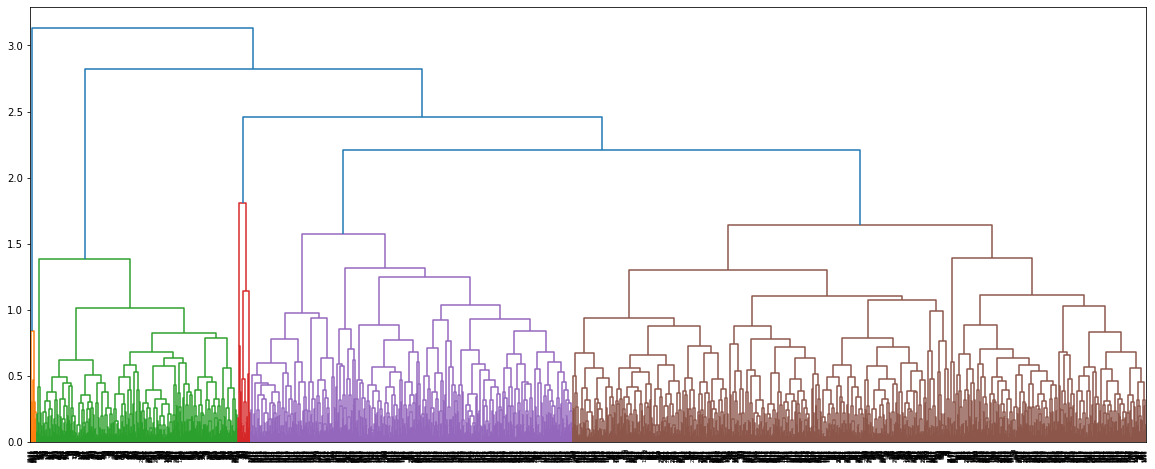

In [175]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(data_pca, method= 'complete'))

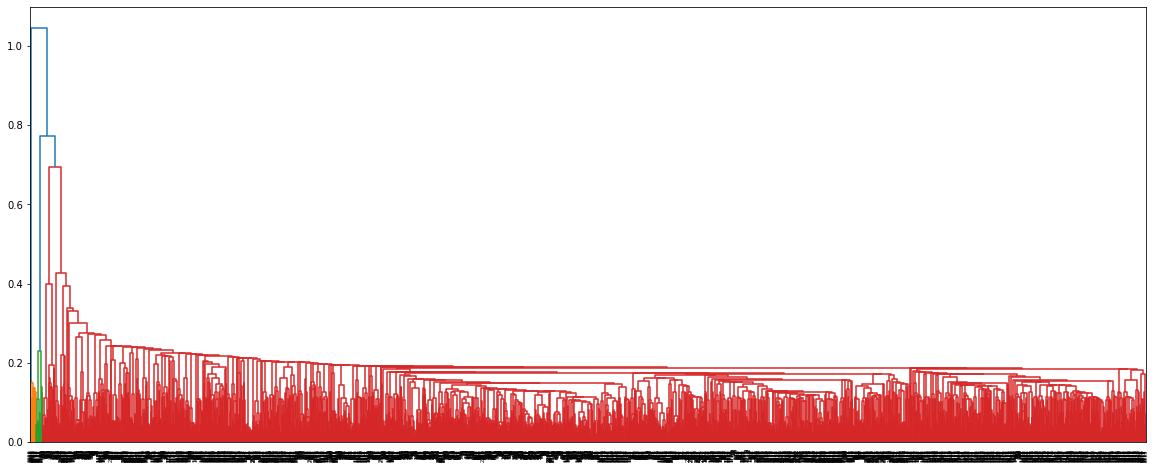

In [176]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(data_pca, method= 'single')) 

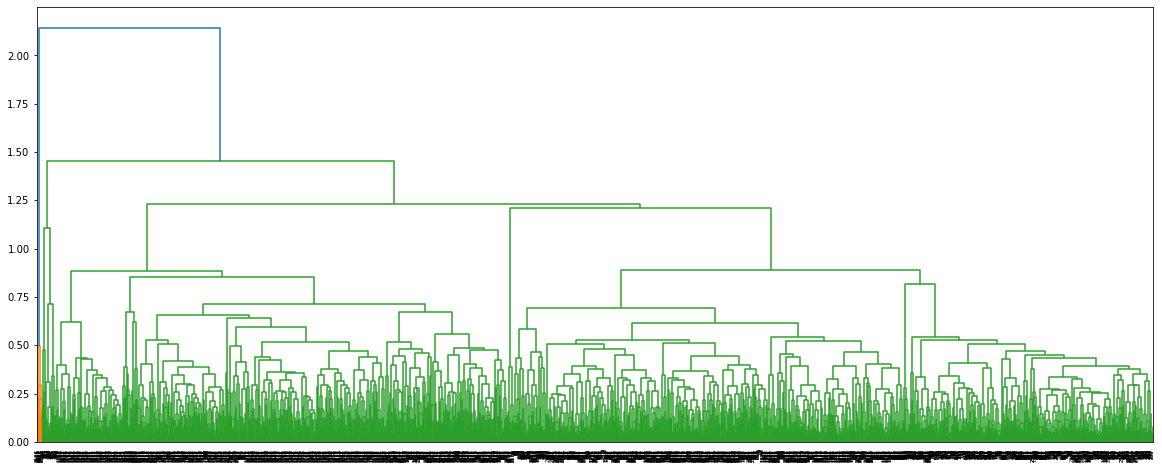

In [177]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(data_pca, method= 'average'))

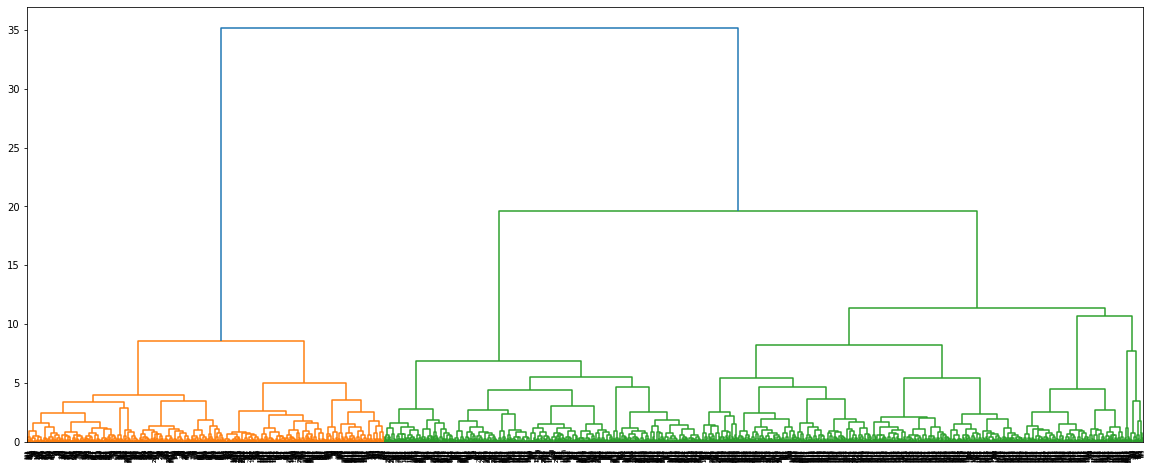

In [178]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(data_pca, method= 'ward'))

From above dendrograms, complete linkage with no. of clusters = 5 seems a good choice, but lets see what silhouette score says about it. 

### silhouette score

In [179]:
linkages = ['complete' , 'single' , 'ward' , 'average']

for i in range (2,8):
    for x in linkages:
        hc=AgglomerativeClustering(n_clusters= i, linkage=x)
        y_hc=hc.fit_predict(data_pca)
        sil_score = sil(data_pca, y_hc)
        print('For n=',i,'and linkage =', x, 'Silhouette score is', np.round(sil_score,4))
 

For n= 2 and linkage = complete Silhouette score is 0.5375
For n= 2 and linkage = single Silhouette score is 0.5375
For n= 2 and linkage = ward Silhouette score is 0.3804
For n= 2 and linkage = average Silhouette score is 0.5375
For n= 3 and linkage = complete Silhouette score is 0.3104
For n= 3 and linkage = single Silhouette score is 0.2153
For n= 3 and linkage = ward Silhouette score is 0.273
For n= 3 and linkage = average Silhouette score is 0.3411
For n= 4 and linkage = complete Silhouette score is 0.3082
For n= 4 and linkage = single Silhouette score is 0.2245
For n= 4 and linkage = ward Silhouette score is 0.2548
For n= 4 and linkage = average Silhouette score is 0.3904
For n= 5 and linkage = complete Silhouette score is 0.2795
For n= 5 and linkage = single Silhouette score is 0.124
For n= 5 and linkage = ward Silhouette score is 0.2574
For n= 5 and linkage = average Silhouette score is 0.3778
For n= 6 and linkage = complete Silhouette score is 0.2798
For n= 6 and linkage = sing

Max value of silhouette score is 0.5375, ocuuring for n = 2. But dendrogram looks good for n = 5.  What to do now? 

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster. 

Here, for n = 2 silhoutte score may be maximum but Silhouette coefficient might be negative resulting in samples getting assigned to the wrong cluster. 

So We will stick to n = 5 

### complete linkage and n_clusters = 5

In [180]:
hc=AgglomerativeClustering(n_clusters=5 , linkage='complete', affinity='euclidean')
y_hc=hc.fit_predict(data_pca)

In [181]:
data1 = data.copy()
data1['ClusterID'] = y_hc 

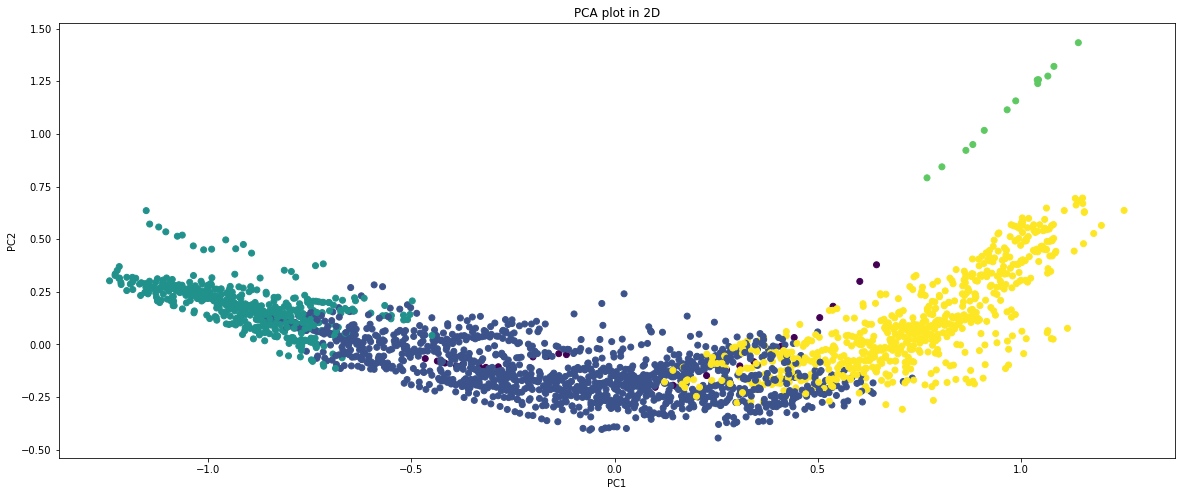

In [182]:
plt.figure(figsize=(20,8))
plt.scatter(data_pca.iloc[:,0] , data_pca.iloc[:,1], c = data1['ClusterID'])

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [183]:
#some countries are part of different clusters so lets take mode of ClusterId for each country.. 

list = []
list1 = []
for country in data1['Country'].unique():
    
    mode = data1[data1['Country'] == country]['ClusterID'].mode()[0]
    list1.append(mode)
    list.append(country)
   
   
    
data_cluster = pd.DataFrame()
data_cluster['Country'] = list
data_cluster['ClusterID'] = list1 

data_cluster = data_cluster.sort_values(by=['ClusterID'], ascending=True) 
data_cluster = data_cluster.reset_index()
data_cluster.drop(columns=['index'], inplace=True) 
data_cluster 

,Country,ClusterID
0,India,0
1,China,0
2,Algeria,1
3,Solomon Islands,1
4,Samoa,1
...,...,...
177,"Macedonia, FYR",4
178,Luxembourg,4
179,Lithuania,4
180,Italy,4


In [184]:
data_cluster[data_cluster['ClusterID']==0] #Asian Rising Stars

,Country,ClusterID
0,India,0
1,China,0


In [185]:
data_cluster[data_cluster['ClusterID']==1] #small economies and developing countries

,Country,ClusterID
2,Algeria,1
3,Solomon Islands,1
4,Samoa,1
5,Papua New Guinea,1
6,"Micronesia, Fed. Sts.",1
...,...,...
88,Kazakhstan,1
89,Benin,1
90,Kyrgyz Republic,1
91,Bangladesh,1


In [186]:
data_cluster[data_cluster['ClusterID']==2] # Under developed

,Country,ClusterID
93,Angola,2
94,"Yemen, Rep.",2
95,Sierra Leone,2
96,Zimbabwe,2
97,Rwanda,2
98,Nigeria,2
99,Niger,2
100,Sudan,2
101,Swaziland,2
102,Tanzania,2


In [187]:
data_cluster[data_cluster['ClusterID']==3] #World Hegemon

,Country,ClusterID
128,United States,3


In [188]:
data_cluster[data_cluster['ClusterID']==4] #European and asian developed countries

,Country,ClusterID
129,Hungary,4
130,Greece,4
131,Aruba,4
132,France,4
133,Finland,4
134,Estonia,4
135,Denmark,4
136,Czech Republic,4
137,Cyprus,4
138,Croatia,4


In [189]:
country = input('Enter Name of Country:')

for i in range (0, len(data_cluster)):
    if data_cluster['Country'][i] == country:
        print(country, 'Belongs To Cluster Number:', data_cluster['ClusterID'][i]) 
        
        if data_cluster['ClusterID'][i] == 0 :
            print('Asian Rising Stars')
        elif data_cluster['ClusterID'][i] == 1 :
            print('small economies')
        elif data_cluster['ClusterID'][i] == 2 :
            print('Under developed')
        elif data_cluster['ClusterID'][i] == 3 :
            print('World Hegemon')
        elif data_cluster['ClusterID'][i] == 4 :
            print('European and asian developed countries')


Enter Name of Country:United States
United States Belongs To Cluster Number: 3
World Hegemon


### ward linkage and n_clusters = 5

In [190]:
hc=AgglomerativeClustering(n_clusters=5 , linkage='ward', affinity='euclidean')
y_hc=hc.fit_predict(data_pca)

In [191]:
data2 = data.copy()
data2['ClusterID'] = y_hc 

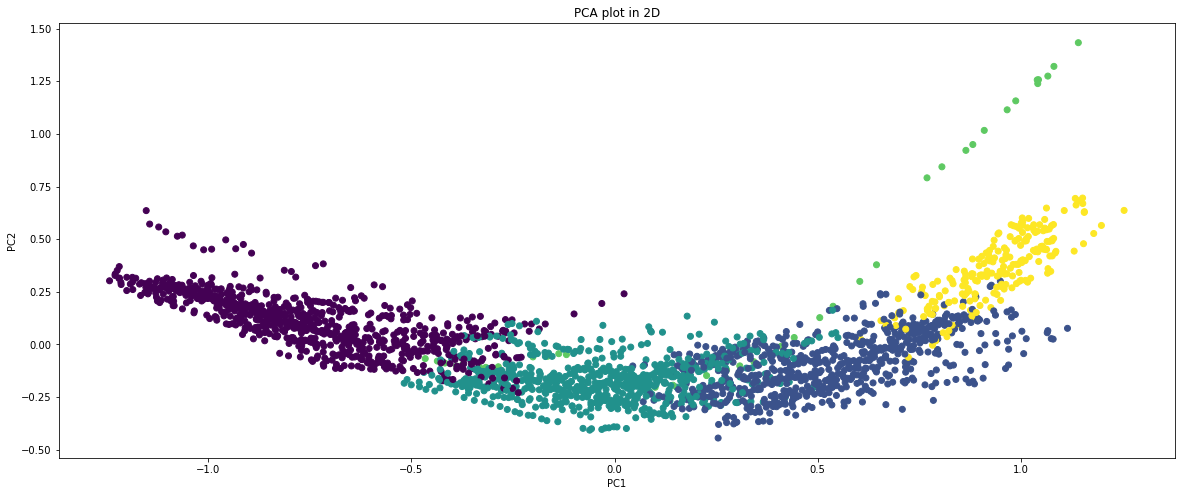

In [192]:
plt.figure(figsize=(20,8))
plt.scatter(data_pca.iloc[:,0] , data_pca.iloc[:,1], c = data2['ClusterID'])

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [193]:
#some countries are part of different clusters so lets take mode of ClusterId for each country.. 

list = []
list1 = []
for country in data2['Country'].unique():
    
    mode = data2[data2['Country'] == country]['ClusterID'].mode()[0]
    list1.append(mode)
    list.append(country)
   
   
    
data_cluster = pd.DataFrame()
data_cluster['Country'] = list
data_cluster['ClusterID'] = list1 

data_cluster = data_cluster.sort_values(by=['ClusterID'], ascending=True) 
data_cluster = data_cluster.reset_index()
data_cluster.drop(columns=['index'], inplace=True) 
data_cluster 

,Country,ClusterID
0,Sudan,0
1,Lao PDR,0
2,Niger,0
3,Nigeria,0
4,Rwanda,0
...,...,...
177,Iceland,4
178,France,4
179,Finland,4
180,Luxembourg,4


In [194]:
data_cluster[data_cluster['ClusterID']==0] # Under developed economy, Lowest Health standards (mostlly african countries)

,Country,ClusterID
0,Sudan,0
1,Lao PDR,0
2,Niger,0
3,Nigeria,0
4,Rwanda,0
5,Sao Tome and Principe,0
6,Senegal,0
7,Sierra Leone,0
8,South Africa,0
9,Haiti,0


In [195]:
data_cluster[data_cluster['ClusterID']==1] #small economies , developing countries, but sometimes developed countries too

,Country,ClusterID
58,Turkey,1
59,Argentina,1
60,"Bahamas, The",1
61,Greece,1
62,Estonia,1
63,Hungary,1
64,Ukraine,1
65,Cuba,1
66,Colombia,1
67,Serbia,1


In [196]:
data_cluster[data_cluster['ClusterID']==2] 

,Country,ClusterID
107,Tonga,2
108,Vanuatu,2
109,Barbados,2
110,Antigua and Barbuda,2
111,Samoa,2
112,Paraguay,2
113,Dominican Republic,2
114,Kiribati,2
115,Uzbekistan,2
116,Turkmenistan,2


In [197]:
data_cluster[data_cluster['ClusterID']==3] # big giants

,Country,ClusterID
160,India,3
161,United States,3
162,China,3


In [198]:
data_cluster[data_cluster['ClusterID']==4] #developed countries with highest health standards

,Country,ClusterID
163,Japan,4
164,Australia,4
165,Denmark,4
166,New Zealand,4
167,United Kingdom,4
168,Switzerland,4
169,Sweden,4
170,Spain,4
171,Norway,4
172,Austria,4


In [199]:
country = input('Enter Name of Country:')

for i in range (0, len(data_cluster)):
    if data_cluster['Country'][i] == country:
        print(country, 'Belongs To Cluster Number:', data_cluster['ClusterID'][i]) 
        
        if data_cluster['ClusterID'][i] == 0 :
            print('Under developed economy, Lowest Health standards')
        elif data_cluster['ClusterID'][i] == 1 :
            print('Small economy , developing country, but sometimes developed country')
        elif data_cluster['ClusterID'][i] == 2 :
            print('Underdeveloped')
        elif data_cluster['ClusterID'][i] == 3 :
            print('Big Giant')
        elif data_cluster['ClusterID'][i] == 4 :
            print('Developed country with highest health standards')


Enter Name of Country:India
India Belongs To Cluster Number: 3
Big Giant


## KMeans Clustering

#### Elbow Method for Determining no of cluster

In [200]:
wcss = []

for i in range (2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
    
wcss 

[715.8935780274138,
 535.9939840633317,
 463.1289612931338,
 417.51384988985785,
 382.4135892302012,
 353.0329452199444,
 330.93661652051213,
 313.2349627653568]

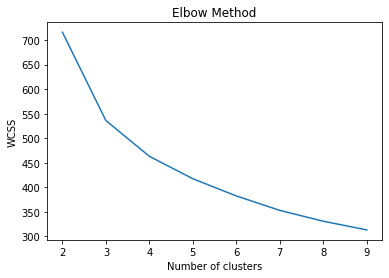

In [201]:
plt.plot(range(2, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

Last abrupt change occured at n = 3.  

In [202]:
clusters = KMeans(n_clusters=3, random_state= 1)
clusters.fit(data_pca)

KMeans(n_clusters=3, random_state=1)

In [203]:
clusters.labels_  

array([1, 1, 1, ..., 1, 0, 0])

In [204]:
data3 = data.copy()
data3['ClusterID'] =clusters.labels_ 

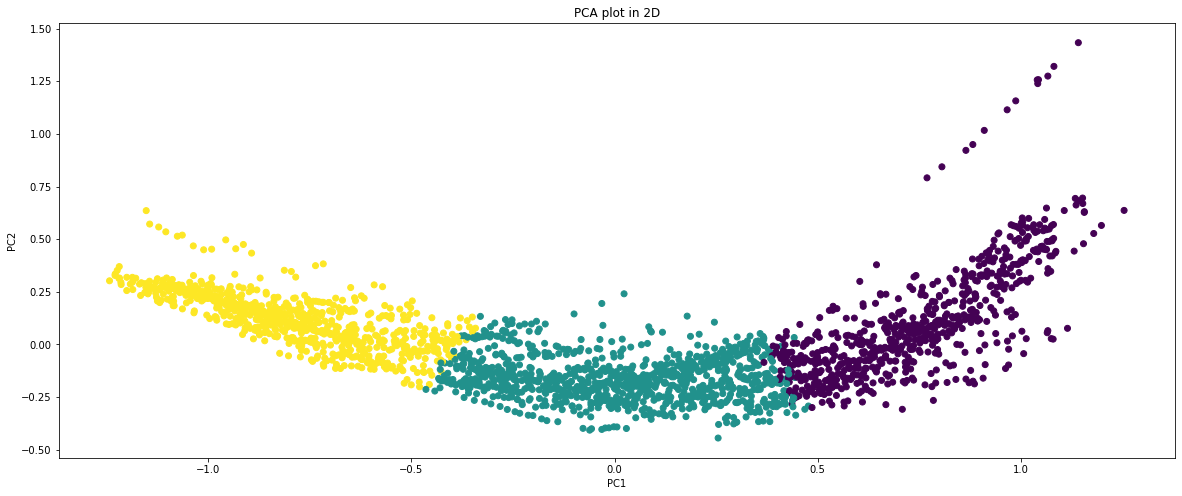

In [205]:
plt.figure(figsize=(20,8))
plt.scatter(data_pca.iloc[:,0] , data_pca.iloc[:,1], c = data3['ClusterID'])

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [206]:
# but some countries are part of different clusters so lets take mode of ClusterId for each country.. 

list = []
list1 = []
for country in data3['Country'].unique():
    
    mode = data3[data3['Country'] == country]['ClusterID'].mode()[0]
    list1.append(mode)
    list.append(country)
   
   
    
data_cluster = pd.DataFrame()
data_cluster['Country'] = list
data_cluster['ClusterID'] = list1 

data_cluster = data_cluster.sort_values(by=['ClusterID'], ascending=True) 
data_cluster = data_cluster.reset_index()
data_cluster.drop(columns=['index'], inplace=True) 
data_cluster  

,Country,ClusterID
0,Germany,0
1,Malta,0
2,"Macedonia, FYR",0
3,Luxembourg,0
4,Lithuania,0
...,...,...
177,Cote d'Ivoire,2
178,Senegal,2
179,Sao Tome and Principe,2
180,Zambia,2


In [207]:
data_cluster[data_cluster['ClusterID']==0] #almost entire europe , N. America and developed asia is here

,Country,ClusterID
0,Germany,0
1,Malta,0
2,"Macedonia, FYR",0
3,Luxembourg,0
4,Lithuania,0
5,Latvia,0
6,Italy,0
7,Ireland,0
8,Iceland,0
9,Hungary,0


In [208]:
data_cluster[data_cluster['ClusterID']==1] #developing country

,Country,ClusterID
55,China,1
56,Bolivia,1
57,Belize,1
58,Argentina,1
59,Antigua and Barbuda,1
...,...,...
124,Georgia,1
125,India,1
126,Brunei Darussalam,1
127,Mauritius,1


In [209]:
data_cluster[data_cluster['ClusterID']==2] # almost all africa is here

,Country,ClusterID
129,Cameroon,2
130,Burundi,2
131,Angola,2
132,Timor-Leste,2
133,Benin,2
134,Zimbabwe,2
135,Lao PDR,2
136,Mauritania,2
137,Eritrea,2
138,Haiti,2


In [210]:
country = input('Enter Name of Country:')

for i in range (0, len(data_cluster)):
    if data_cluster['Country'][i] == country:
        print(country, 'Belongs To Cluster Number:', data_cluster['ClusterID'][i]) 
        
        if data_cluster['ClusterID'][i] == 0 :
            print('Developed economy, High health standards')
        elif data_cluster['ClusterID'][i] == 1 :
            print('Developing country')
        elif data_cluster['ClusterID'][i] == 2 :
            print('Underdeveloped Economy, Lowest health standards')
       

Enter Name of Country:Uganda
Uganda Belongs To Cluster Number: 2
Underdeveloped Economy, Lowest health standards


## DBSCAN

Disadvantages of Kmeans:

    Prior knowledge of number of cluster
    
    Clusters skewed by outliers
    
    Creates only compact clusters

In [211]:
dbscan = DBSCAN(eps=0.5, min_samples=20) # min_samples > = no of columns
dbscan.fit(data_pca)
dbscan.labels_


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

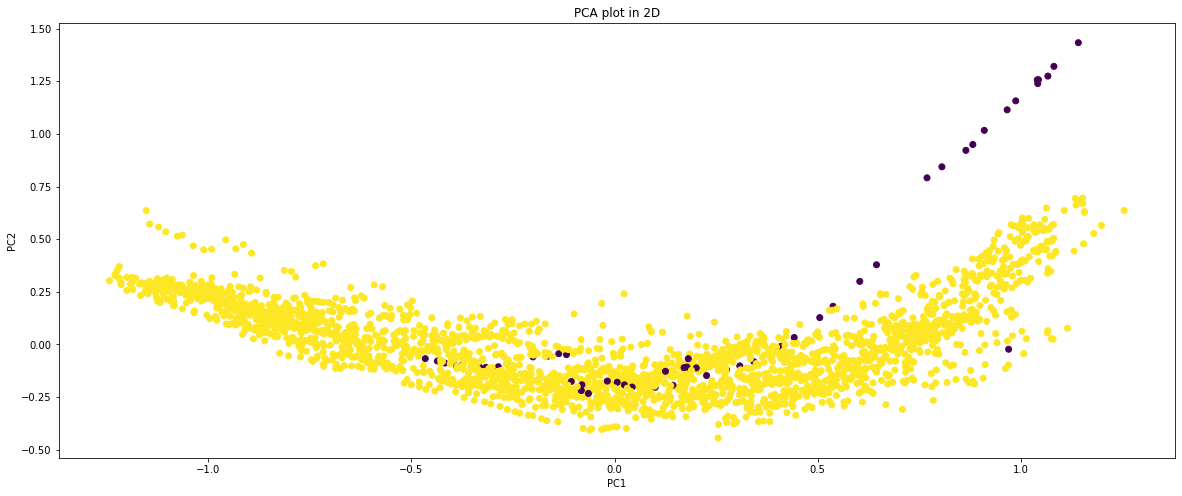

In [212]:
plt.figure(figsize=(20,8))
plt.scatter(data_pca.iloc[:,0] , data_pca.iloc[:,1], c = dbscan.labels_)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## KNN

In [213]:
data_knn = data1.drop(columns=['Country']) 
data_knn_y = data_knn['ClusterID']  
data_knn_x = data_knn.iloc[:, 0:20] 

In [214]:
df_test = pd.DataFrame({'Birth Rate':0.014, 'CO2 Emissions':41345.0, 'Days to Start Business':18.0, 'Energy Usage':13574.0,
       'GDP_$':97331522066.0, 'Health Exp % GDP':0.061, 'Health Exp/Capita_$':1572.0,
       'Infant Mortality Rate':0.006, 'Internet Usage':0.2, 'Lending Interest':0.048,
       'Life Expectancy Female':79.0, 'Life Expectancy Male':74.0, 'Mobile Phone Usage':0.6,
       'Population 0-14':0.218, 'Population 15-64':0.67, 'Population 65+':0.112,
       'Population Total':3805174.0, 'Population Urban':0.591, 'Tourism Inbound_$':3517000000,
       'Tourism Outbound_$':2626000000}, index=[0]) 
                      
df_test       

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP_$,Health Exp % GDP,Health Exp/Capita_$,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound_$,Tourism Outbound_$
0,0.014,41345.0,18.0,13574.0,9.733152e+10,0.061,1572.0,0.006,0.2,0.048,79.0,74.0,0.6,0.218,0.67,0.112,3805174.0,0.591,3517000000,2626000000


In [215]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(data_knn_x , data_knn_y)
  
# Predict 
a = knn.predict(df_test)
if a==0:
    print('Asian Rising Stars')
elif a==1:
    print('small economies but developed')
elif a==2:
    print('Under developed')
elif a==3:
    print('World Hegemon')
elif a==4:
    print('European and asian developed countries')


small economies but developed


### Country with attributes as specified in df_test is clustered into cluster 1, which indicates it is a developed country. 

## Pipeline 

In [216]:
from sklearn.pipeline import Pipeline 

In [217]:
estimators = []
estimators.append(('knn', KNeighborsClassifier(n_neighbors=7) ))

In [218]:
model = Pipeline(estimators) 

In [219]:
model.fit(data_knn_x , data_knn_y)

Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=7))])

## Save Model Using Pickle

In [220]:
import pickle 
pickle.dump(model, open('knn.pkl', 'wb')) 

In [221]:
loaded_model = pickle.load(open('knn.pkl', 'rb')) 

In [222]:
prediction = loaded_model.predict(df_test)

## Multiclass Classification

In [223]:
data_lr = data1.drop(columns=['Country'])
data_lr  

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP_$,Health Exp % GDP,Health Exp/Capita_$,Infant Mortality Rate,Internet Usage,Lending Interest,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound_$,Tourism Outbound_$,ClusterID
0,0.020,87931.000000,25.000000,26998.000000,5.479006e+10,0.035000,60.000000,0.034000,0.0,0.100000,...,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,1
1,0.019,84293.000000,25.000000,27072.000000,5.474472e+10,0.038000,65.000000,0.033000,0.0,0.095000,...,68.0,0.0,0.330,0.630,0.040,32150198.0,0.607,1.000000e+08,1.940000e+08,1
2,0.019,90854.000000,25.000000,28773.000000,5.676029e+10,0.037000,65.000000,0.032000,0.0,0.086000,...,68.0,0.0,0.318,0.641,0.041,32572977.0,0.615,1.110000e+08,2.480000e+08,1
3,0.020,92533.000000,25.000000,30698.000000,6.786383e+10,0.036000,74.000000,0.031000,0.0,0.081000,...,68.0,0.0,0.307,0.651,0.042,33003442.0,0.623,1.120000e+08,2.550000e+08,1
4,0.020,89493.000000,25.000000,30974.000000,8.532500e+10,0.035000,90.000000,0.030000,0.0,0.080000,...,68.0,0.1,0.297,0.660,0.043,33461345.0,0.631,1.780000e+08,3.410000e+08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,0.022,16487.369823,23.116094,11011.520245,3.516421e+10,0.020000,129.000000,0.048000,0.1,0.125000,...,61.0,1.1,0.286,0.673,0.041,5172931.0,0.490,1.994826e+09,1.194824e+09,1
2362,0.021,37165.403083,12.000000,15514.342652,5.118344e+10,0.059000,105.000000,0.038000,0.4,0.120000,...,65.0,0.7,0.289,0.668,0.043,29774500.0,0.362,2.186816e+09,4.117298e+08,1
2363,0.023,145.152328,31.000000,1085.136197,1.749845e+08,0.107000,187.000000,0.046000,0.1,0.092006,...,66.0,0.2,0.324,0.636,0.040,100786.0,0.439,1.413596e+09,2.959160e+08,1
2364,0.010,57.381816,31.000000,745.749255,1.740623e+08,0.107338,184.973752,0.046338,0.7,0.092000,...,73.0,1.3,0.199,0.690,0.110,102384.0,0.424,1.414000e+09,2.960000e+08,4


In [224]:
data_lr_y = data_lr['ClusterID']  
data_lr_x = data_lr.iloc[:, 0:20] 

In [225]:
scaler_lr = MinMaxScaler() 
data_lr_x = scaler_lr.fit_transform(data_lr_x) 

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_lr_x, data_lr_y, test_size=0.25) 

In [227]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [228]:
model.fit(X_train, y_train) 

LogisticRegression()

In [229]:
model.score(X_test, y_test) 

0.9324324324324325

In [230]:
y_pred =model.predict(X_test)

In [231]:
df = pd.DataFrame()
df['Actual'] =y_test
df['Predicted'] = y_pred

In [232]:
df.head() 

,Actual,Predicted
243,2,2
2265,1,1
2108,1,1
1474,4,4
2256,2,2


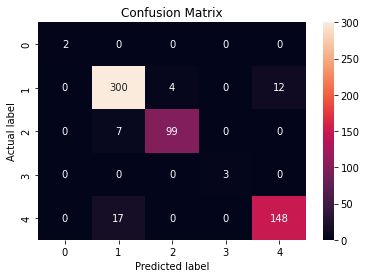

In [233]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(confusion_matrix, annot=True, fmt='d' )
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.show()

In [234]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.93      0.95      0.94       316
           2       0.96      0.93      0.95       106
           3       1.00      1.00      1.00         3
           4       0.93      0.90      0.91       165

    accuracy                           0.93       592
   macro avg       0.96      0.96      0.96       592
weighted avg       0.93      0.93      0.93       592



## Save Model Using Pickle

In [235]:
import pickle 
pickle.dump(model, open('log.pkl', 'wb')) 

In [236]:
loaded_model = pickle.load(open('log.pkl', 'rb')) 

In [239]:
prediction = loaded_model.predict(df_test) 
prediction 

array([3], dtype=int64)

In [ ]:
0 :('Asian Rising Stars')
1 :('small economies')
2 :('Under developed'
3 :('World Hegemon')
4 :('European and asian developed countries')

# Thank You.... 